In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from datetime import datetime
import json

class UrduNewsScraper:
    def __init__(self):
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        self.articles = []

    def scrape_bbc_urdu(self, num_articles=100):
        """Scrape articles from BBC Urdu"""
        print(f"Scraping BBC Urdu...")
        base_url = "https://www.bbc.com/urdu"

        try:
            # Get main page
            response = requests.get(base_url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            # Find article links
            article_links = []
            for link in soup.find_all('a', href=True):
                href = link['href']
                if '/urdu/articles/' in href or '/urdu/' in href:
                    full_url = href if href.startswith('http') else f"https://www.bbc.com{href}"
                    if full_url not in article_links:
                        article_links.append(full_url)

            # Scrape individual articles
            for i, url in enumerate(article_links[:num_articles]):
                try:
                    article_data = self._scrape_bbc_article(url)
                    if article_data:
                        self.articles.append(article_data)
                        print(f"Scraped {len(self.articles)} articles", end='\r')
                    time.sleep(random.uniform(1, 3))
                except Exception as e:
                    print(f"Error scraping {url}: {e}")
                    continue

        except Exception as e:
            print(f"Error scraping BBC Urdu: {e}")

    def _scrape_bbc_article(self, url):
        """Scrape individual BBC Urdu article"""
        try:
            response = requests.get(url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            # Extract title
            title = soup.find('h1')
            title = title.text.strip() if title else ""

            # Extract article text
            paragraphs = soup.find_all('p')
            content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

            if title and content and len(content) > 100:
                return {
                    'title': title,
                    'content': content,
                    'url': url,
                    'source': 'BBC Urdu',
                    'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                }
        except:
            return None

    def scrape_dawn_urdu(self, num_articles=100):
        """Scrape articles from Dawn News Urdu"""
        print(f"\nScraping Dawn News Urdu...")
        base_url = "https://www.dawnnews.tv/urdu"

        try:
            response = requests.get(base_url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            article_links = []
            for link in soup.find_all('a', href=True):
                href = link['href']
                if '/news/' in href or 'dawnnews.tv' in href:
                    full_url = href if href.startswith('http') else f"https://www.dawnnews.tv{href}"
                    if full_url not in article_links:
                        article_links.append(full_url)

            for url in article_links[:num_articles]:
                try:
                    article_data = self._scrape_dawn_article(url)
                    if article_data:
                        self.articles.append(article_data)
                        print(f"Scraped {len(self.articles)} articles", end='\r')
                    time.sleep(random.uniform(1, 3))
                except Exception as e:
                    continue

        except Exception as e:
            print(f"Error scraping Dawn Urdu: {e}")

    def _scrape_dawn_article(self, url):
        """Scrape individual Dawn article"""
        try:
            response = requests.get(url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            title = soup.find('h1')
            title = title.text.strip() if title else ""

            paragraphs = soup.find_all('p')
            content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

            if title and content and len(content) > 100:
                return {
                    'title': title,
                    'content': content,
                    'url': url,
                    'source': 'Dawn Urdu',
                    'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                }
        except:
            return None

    def scrape_express_urdu(self, num_articles=100):
        """Scrape articles from Express News Urdu"""
        print(f"\nScraping Express News Urdu...")
        base_url = "https://www.express.pk"

        try:
            response = requests.get(base_url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            article_links = []
            for link in soup.find_all('a', href=True):
                href = link['href']
                if 'express.pk' in href or href.startswith('/'):
                    full_url = href if href.startswith('http') else f"https://www.express.pk{href}"
                    if full_url not in article_links and 'story' in full_url:
                        article_links.append(full_url)

            for url in article_links[:num_articles]:
                try:
                    article_data = self._scrape_express_article(url)
                    if article_data:
                        self.articles.append(article_data)
                        print(f"Scraped {len(self.articles)} articles", end='\r')
                    time.sleep(random.uniform(1, 3))
                except Exception as e:
                    continue

        except Exception as e:
            print(f"Error scraping Express Urdu: {e}")

    def _scrape_express_article(self, url):
        """Scrape individual Express article"""
        try:
            response = requests.get(url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            title = soup.find('h1')
            title = title.text.strip() if title else ""

            paragraphs = soup.find_all('p')
            content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

            if title and content and len(content) > 100:
                return {
                    'title': title,
                    'content': content,
                    'url': url,
                    'source': 'Express Urdu',
                    'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                }
        except:
            return None

    def scrape_geo_urdu(self, num_articles=100):
        """Scrape articles from Geo News Urdu"""
        print(f"\nScraping Geo News Urdu...")
        base_url = "https://urdu.geo.tv"

        try:
            response = requests.get(base_url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            article_links = []
            for link in soup.find_all('a', href=True):
                href = link['href']
                full_url = href if href.startswith('http') else f"https://urdu.geo.tv{href}"
                if 'urdu.geo.tv' in full_url and full_url not in article_links:
                    article_links.append(full_url)

            for url in article_links[:num_articles]:
                try:
                    article_data = self._scrape_geo_article(url)
                    if article_data:
                        self.articles.append(article_data)
                        print(f"Scraped {len(self.articles)} articles", end='\r')
                    time.sleep(random.uniform(1, 3))
                except Exception as e:
                    continue

        except Exception as e:
            print(f"Error scraping Geo Urdu: {e}")

    def _scrape_geo_article(self, url):
        """Scrape individual Geo article"""
        try:
            response = requests.get(url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            title = soup.find('h1')
            title = title.text.strip() if title else ""

            paragraphs = soup.find_all('p')
            content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])

            if title and content and len(content) > 100:
                return {
                    'title': title,
                    'content': content,
                    'url': url,
                    'source': 'Geo Urdu',
                    'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                }
        except:
            return None

    def scrape_all(self, total_articles=500):
        """Scrape articles from all sources"""
        articles_per_source = total_articles // 4

        self.scrape_bbc_urdu(articles_per_source)
        self.scrape_dawn_urdu(articles_per_source)
        self.scrape_express_urdu(articles_per_source)
        self.scrape_geo_urdu(articles_per_source)

        print(f"\n\nTotal articles scraped: {len(self.articles)}")
        return self.articles

    def save_to_csv(self, filename='urdu_news_articles.csv'):
        """Save scraped articles to CSV"""
        if self.articles:
            df = pd.DataFrame(self.articles)
            df.to_csv(filename, index=False, encoding='utf-8-sig')
            print(f"Data saved to {filename}")
            return df
        else:
            print("No articles to save")
            return None

    def save_to_json(self, filename='urdu_news_articles.json'):
        """Save scraped articles to JSON"""
        if self.articles:
            with open(filename, 'w', encoding='utf-8') as f:
                json.dump(self.articles, f, ensure_ascii=False, indent=2)
            print(f"Data saved to {filename}")
        else:
            print("No articles to save")


# Usage Example
if __name__ == "__main__":
    scraper = UrduNewsScraper()

    # Scrape 500 articles from multiple Urdu news sources
    articles = scraper.scrape_all(total_articles=500)

    # Save to CSV
    df = scraper.save_to_csv('urdu_news_dataset.csv')

    # Save to JSON
    scraper.save_to_json('urdu_news_dataset.json')

    # Display sample statistics
    if df is not None:
        print("\n=== Dataset Statistics ===")
        print(f"Total Articles: {len(df)}")
        print(f"\nArticles by Source:")
        print(df['source'].value_counts())
        print(f"\nAverage Content Length: {df['content'].str.len().mean():.0f} characters")
        print(f"\nSample Article:")
        print(f"Title: {df.iloc[0]['title']}")
        print(f"Source: {df.iloc[0]['source']}")
        print(f"Content Preview: {df.iloc[0]['content'][:200]}...")

Scraping BBC Urdu...

Scraping Dawn News Urdu...

Scraping Express News Urdu...

Scraping Geo News Urdu...


Total articles scraped: 204
Data saved to urdu_news_dataset.csv
Data saved to urdu_news_dataset.json

=== Dataset Statistics ===
Total Articles: 204

Articles by Source:
source
Express Urdu    116
BBC Urdu         57
Dawn Urdu        31
Name: count, dtype: int64

Average Content Length: 3670 characters

Sample Article:
Title: پاکستان
Source: BBC Urdu
Content Preview: © 2025 بی بی سی. بی بی سی بیرونی ویب سائٹس کے مواد کا ذمہ دار نہیں بیرونی لنکس کے بارے میں ہماری پالیسی....


In [3]:
import pandas as pd
import re

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv("urdu_news_dataset.csv", encoding="utf-8-sig")

print("Before cleaning:", df.shape)

# ------------------------------
# 1. Drop duplicates
# ------------------------------
df.drop_duplicates(subset=["title", "content"], inplace=True)

# ------------------------------
# 2. Remove rows with missing content or short content
# ------------------------------
df.dropna(subset=["content"], inplace=True)
df = df[df["content"].str.len() > 150]   # remove very small articles

# ------------------------------
# 3. Urdu text normalization
# ------------------------------
def normalize_urdu(text):
    text = str(text)
    text = text.replace("\u0649", "\u06CC")  # ى → ی
    text = text.replace("\u06D2", "\u06D2")  # ے → same (for consistency)
    return text

df["content"] = df["content"].apply(normalize_urdu)
df["title"] = df["title"].apply(normalize_urdu)

# ------------------------------
# 4. Remove English, URLs, special chars, emojis
# ------------------------------
def clean_text(text):
    text = str(text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+", " ", text)

    # Remove English letters & numbers
    text = re.sub(r"[A-Za-z0-9]", " ", text)

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(" ", text)

    # Remove hashtags, mentions
    text = re.sub(r"[@#]\w+", " ", text)

    # Remove punctuation
    text = re.sub(r"[^\w\s،؟ءآأإئًٌٍَُل]", " ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

df["content"] = df["content"].apply(clean_text)
df["title"] = df["title"].apply(clean_text)

# ------------------------------
# 5. Remove boilerplate text (ads, copyright)
# ------------------------------
remove_phrases = [
    "مزید پڑھیں", "تفصیلات سامنے آئیں", "مزید تفصیل",
    "ویڈیو دیکھیں", "مزید خبریں", "تحریر جاری ہے"
]

def remove_boilerplate(text):
    for p in remove_phrases:
        text = text.replace(p, " ")
    return text.strip()

df["content"] = df["content"].apply(remove_boilerplate)

# ------------------------------
# 6. Final drop empty texts after cleaning
# ------------------------------
df = df[df["content"].str.len() > 150]

print("After cleaning:", df.shape)

# ------------------------------
# Save cleaned dataset
# ------------------------------
df.to_csv("urdu_news_cleaned.csv", index=False, encoding="utf-8-sig")
print("Cleaned dataset saved as urdu_news_cleaned.csv")

df.head()


Before cleaning: (204, 5)
After cleaning: (161, 5)
Cleaned dataset saved as urdu_news_cleaned.csv


,title,content,url,source,scraped_date
7,عظمی خان کی اڈیالہ جیل میں عمران خان سے ملاقات...,تقریباً ایک مہینے بعد سابق وزیر اعظم عمران خان...,https://www.bbc.com/urdu/articles/cm2vx8yd1k6o,BBC Urdu,2025-12-03 01:56:37
8,اسلام آباد میں کم عمر ڈرائیور کی مبینہ ٹکر سے ...,،تصویر کا ذریعہ ثمرین کا چھوٹا بھائی ارسلان کھ...,https://www.bbc.com/urdu/articles/c4g64e0ly4zo,BBC Urdu,2025-12-03 01:56:39
9,انچ سکرین سام سنگ کا پہلا تین تہوں والا سمارٹ ...,،تصویر کا ذریعہ سام سنگ نے منگل کو اپنے پہلے م...,https://www.bbc.com/urdu/articles/c0mp9gmm3jmo,BBC Urdu,2025-12-03 01:56:41
10,رومانوی مشوروں سے مالیاتی مدد تک امیر اور طاقت...,،تصویر کا ذریعہ یہ میں واشنگٹن کے بڑے اہم واقع...,https://www.bbc.com/urdu/articles/cn5lx49ypxeo,BBC Urdu,2025-12-03 01:56:44
11,فیصل آباد میں بیٹے کے ہاتھوں باپ کا مبینہ قتل ...,،تصویر کا ذریعہ پاکستان کے شہر فیصل آباد کے تھ...,https://www.bbc.com/urdu/articles/c20gx60vnr9o,BBC Urdu,2025-12-03 01:56:46


In [4]:
import pandas as pd
import re

# ----------------------------------------------------
# LOAD DATA
# ----------------------------------------------------
df = pd.read_csv("urdu_news_dataset.csv", encoding="utf-8-sig")
print("Before cleaning:", df.shape)

# ----------------------------------------------------
# BASIC CLEANING
# ----------------------------------------------------
df.drop_duplicates(subset=["title", "content"], inplace=True)
df.dropna(subset=["content"], inplace=True)
df = df[df["content"].str.len() > 150]

# ----------------------------------------------------
# UNICODE NORMALIZATION (URDU SPECIFIC)
# ----------------------------------------------------
def normalize_urdu(text):
    text = str(text)
    text = text.replace("ك", "ک")
    text = text.replace("ي", "ی")
    text = text.replace("ى", "ی")
    text = text.replace("ہ", "ه")
    text = text.replace("ے", "ے")
    return text

df["content"] = df["content"].apply(normalize_urdu)
df["title"] = df["title"].apply(normalize_urdu)

# ----------------------------------------------------
# REMOVE URLS, EMOJIS, ENGLISH, NUMBERS, PUNCTUATION
# ----------------------------------------------------
def clean_text(text):
    text = re.sub(r"http\S+|www\S+", " ", str(text))      # URLs
    text = re.sub(r"[A-Za-z0-9]", " ", text)              # English + Numbers
    text = re.sub(r"[@#]\w+", " ", text)                  # @handles #hashtags

    # Emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(" ", text)

    # Remove punctuation except Urdu comma, question mark
    text = re.sub(r"[^\w\s،؟ءآأإئًٌٍَُذڑ]", " ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

df["content"] = df["content"].apply(clean_text)

# ----------------------------------------------------
# URDU STOPWORDS LIST (BIG + OPTIMIZED FOR HATE SPEECH)
# ----------------------------------------------------
urdu_stopwords = set("""
ہے ہیں تھا تھے ہوئی ہوئے کرنا کرنا تھا کر کے کیے کیا کی گئی گیا گے گی تو یہ والا والی والا ایک میں ہم آپ وہ جو سے کہ پر اور جس تمام بہت لئے لئے تک والا لیکن کیلیے جبکہ بعدها پھر ہونا چاہئے ظاہر کیا گیا کیونکہ وغیرہ وغیرہ اپنی اپنے اپنا تمام لہذا درمیان شاید وہاں کہیں کوئی ساتھ تھا تھیں ہوگی سکتے سکتے تھے کچھ کسی تک تک اسی بارے متعلق مزید تمام شامل دوران بنانا بنانے بنایا کرنا کرنی کرلے کرلی پھر بعد پہلے شروع جاری ختم علاوہ ہوگی ہوگیا ہوچکا ہوچکی دیتی دیتا دیتے دیئے دیا تھیں والی والے صرف وجہ کرنا بنا بناے بناکر زیادہ اس اسکی اسکے اسکا ان انکی انکے انکا
""".split())

# Optional: Hate speech detection often removes names of politicians
political_words = set("""
پاکستان مسلم لیگ ن لیگ پی ٹی آئی تحریک انصاف مسلم لیگ ق پیپلز پارٹی بلاول عمران خان مریم نواز شہباز شریف جنرل باجوہ آرمی عدلیہ سپریم کورٹ
""".split())

# Merge into one stopword list
final_stopwords = urdu_stopwords.union(political_words)

# ----------------------------------------------------
# REMOVE STOPWORDS
# ----------------------------------------------------
def remove_stopwords(text):
    words = text.split()
    clean_words = [w for w in words if w not in final_stopwords and len(w) > 2]
    return " ".join(clean_words)

df["content"] = df["content"].apply(remove_stopwords)

# ----------------------------------------------------
# REMOVE BOILERPLATE NEWS PHRASES
# ----------------------------------------------------
remove_phrases = [
    "مزید پڑھیں", "ویڈیو دیکھیں", "تفصیلات سامنے آئیں", "مزید خبریں",
    "خبر جاری ہے", "رپورٹ کے مطابق", "ذرائع کے مطابق"
]

def remove_boilerplate(text):
    for p in remove_phrases:
        text = text.replace(p, " ")
    return text

df["content"] = df["content"].apply(remove_boilerplate)

# ----------------------------------------------------
# FINAL FILTER (REMOVE EMPTY OR VERY SMALL AFTER CLEANING)
# ----------------------------------------------------
df = df[df["content"].str.len() > 50]

print("After cleaning:", df.shape)

# ----------------------------------------------------
# SAVE CLEAN DATA
# ----------------------------------------------------
df.to_csv("urdu_news_cleaned_hatespeech.csv", index=False, encoding="utf-8-sig")
print("Saved cleaned dataset as urdu_news_cleaned_hatespeech.csv")


Before cleaning: (204, 5)
After cleaning: (162, 5)
Saved cleaned dataset as urdu_news_cleaned_hatespeech.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import nltk
nltk.download('punkt')

# Load clean dataset
df = pd.read_csv("urdu_news_cleaned_hatespeech.csv", encoding="utf-8-sig")

print(df.shape)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(162, 5)


,title,content,url,source,scraped_date
0,عظمیٰ خان کی اڈیاله جیل میں عمران خان سے ملاقا...,تقریباً مهینے سابق وزیر اعظم ملاقات منگل بهن ع...,https://www.bbc.com/urdu/articles/cm2vx8yd1k6o,BBC Urdu,2025-12-03 01:56:37
1,اسلام آباد میں کم عمر ڈرائیور کی مبینه ٹکر سے ...,،تصویر ذریعه ثمرین چھوٹا بھائی ارسلان کھنه پُل...,https://www.bbc.com/urdu/articles/c4g64e0ly4zo,BBC Urdu,2025-12-03 01:56:39
2,’10 انچ سکرین‘: سام سنگ کا پهلا ’تین تهوں والا...,،تصویر ذریعه سام سنگ منگل پهلے ملٹی فولڈنگ سما...,https://www.bbc.com/urdu/articles/c0mp9gmm3jmo,BBC Urdu,2025-12-03 01:56:41
3,رومانوی مشوروں سے مالیاتی مدد تک: امیر اور طاق...,،تصویر ذریعه واشنگٹن بڑے اهم واقعات نظریں ڈونل...,https://www.bbc.com/urdu/articles/cn5lx49ypxeo,BBC Urdu,2025-12-03 01:56:44
4,فیصل آباد میں بیٹے کے هاتھوں باپ کا مبینه قتل:...,،تصویر ذریعه شهر فیصل آباد تھانه سٹی جڑانواله ...,https://www.bbc.com/urdu/articles/c20gx60vnr9o,BBC Urdu,2025-12-03 01:56:46


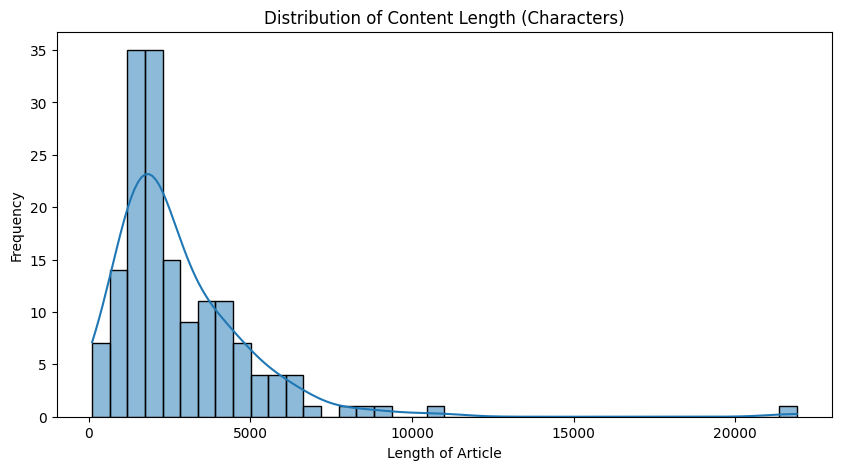

In [6]:
df["text_len"] = df["content"].str.len()

plt.figure(figsize=(10,5))
sns.histplot(df["text_len"], bins=40, kde=True)
plt.title("Distribution of Content Length (Characters)")
plt.xlabel("Length of Article")
plt.ylabel("Frequency")
plt.show()


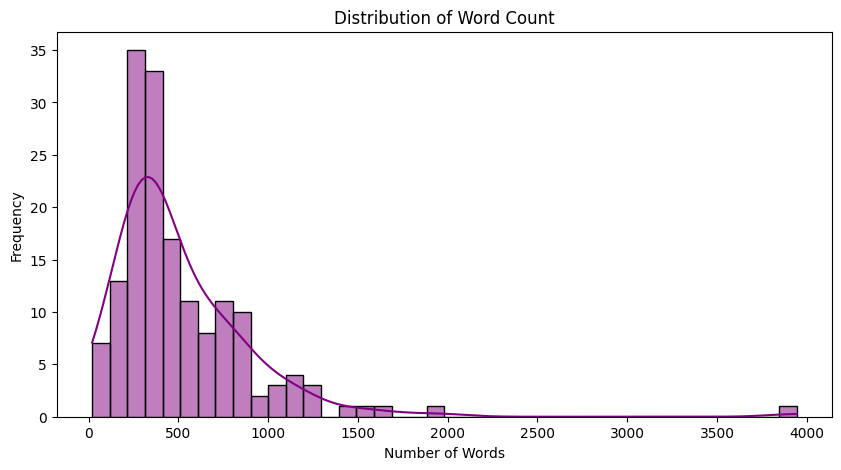

In [7]:
df["word_count"] = df["content"].str.split().apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df["word_count"], bins=40, kde=True, color="purple")
plt.title("Distribution of Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


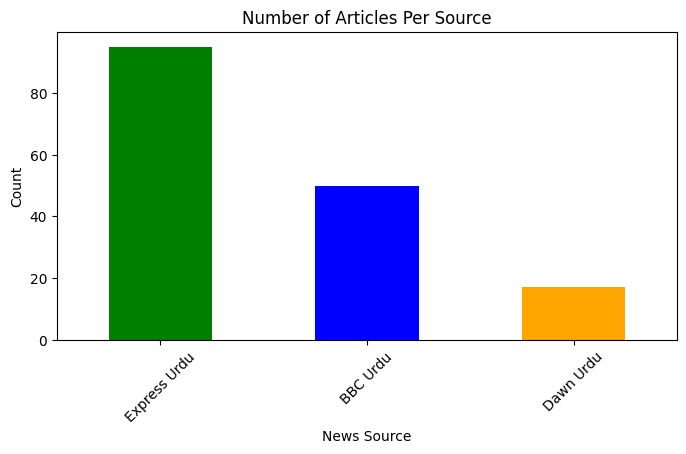

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df["source"].value_counts().plot(
    kind="bar",
    color=["green", "blue", "orange"]  # <- FIXED (list of colors)
)
plt.title("Number of Articles Per Source")
plt.xlabel("News Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [9]:
                   !pip install arabic-reshaper python-bidi wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 6.7 MB/s eta 0:00:00


In [10]:
import os

font_list = []
for root, dirs, files in os.walk("/usr/share/fonts", topdown=True):
    for file in files:
        if file.endswith(".ttf"):
            font_list.append(os.path.join(root, file))

font_list[:50]  # show first 50


['/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/

In [11]:
!apt-get update
!apt-get install fonts-noto-core fonts-noto-unhinted
!apt-get install fonts-nafees fonts-kacst


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,159 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main 

In [12]:
import os

font_list = []
for root, dirs, files in os.walk("/usr/share/fonts", topdown=True):
    for file in files:
        if file.endswith(".ttf"):
            font_list.append(os.path.join(root, file))

font_list[:100]


['/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/

In [13]:
import os

font_path = None
for root, dirs, files in os.walk("/usr/share/fonts", topdown=True):
    for file in files:
        name = file.lower()
        if ("arab" in name or "naskh" in name or "nafees" in name or "kacst" in name) and name.endswith(".ttf"):
            font_path = os.path.join(root, file)
            break

font_path


'/usr/share/fonts/truetype/kacst/mry_KacstQurn.ttf'

In [14]:
font_path = "/usr/share/fonts/truetype/kacst-one/KacstOne.ttf"


In [15]:
import pandas as pd

df = pd.read_csv("urdu_news_cleaned_hatespeech.csv")
df.head()


,title,content,url,source,scraped_date
0,عظمیٰ خان کی اڈیاله جیل میں عمران خان سے ملاقا...,تقریباً مهینے سابق وزیر اعظم ملاقات منگل بهن ع...,https://www.bbc.com/urdu/articles/cm2vx8yd1k6o,BBC Urdu,2025-12-03 01:56:37
1,اسلام آباد میں کم عمر ڈرائیور کی مبینه ٹکر سے ...,،تصویر ذریعه ثمرین چھوٹا بھائی ارسلان کھنه پُل...,https://www.bbc.com/urdu/articles/c4g64e0ly4zo,BBC Urdu,2025-12-03 01:56:39
2,’10 انچ سکرین‘: سام سنگ کا پهلا ’تین تهوں والا...,،تصویر ذریعه سام سنگ منگل پهلے ملٹی فولڈنگ سما...,https://www.bbc.com/urdu/articles/c0mp9gmm3jmo,BBC Urdu,2025-12-03 01:56:41
3,رومانوی مشوروں سے مالیاتی مدد تک: امیر اور طاق...,،تصویر ذریعه واشنگٹن بڑے اهم واقعات نظریں ڈونل...,https://www.bbc.com/urdu/articles/cn5lx49ypxeo,BBC Urdu,2025-12-03 01:56:44
4,فیصل آباد میں بیٹے کے هاتھوں باپ کا مبینه قتل:...,،تصویر ذریعه شهر فیصل آباد تھانه سٹی جڑانواله ...,https://www.bbc.com/urdu/articles/c20gx60vnr9o,BBC Urdu,2025-12-03 01:56:46


In [16]:
import pandas as pd

df = pd.read_csv("urdu_news_cleaned_hatespeech.csv")

hate_words = [
    "گالی", "لعنت", "حرام", "گدھا", "بے وقوف", "گندا", "پاگل",
    "بدتمیز", "منافق", "چور", "ظالم", "جاہل", "بکواس",
    "گھٹیا", "چرسی", "کافر", "بزدل"
]

def auto_label(text):
    if isinstance(text, str):
        for h in hate_words:
            if h in text:
                return 1
    return 0

df["label"] = df["content"].apply(auto_label)

df.to_csv("urdu_news_labeled.csv", index=False, encoding="utf-8-sig")

df["label"].value_counts()


,count
label,
0,138
1,24


Dataset shape: (162, 6)
                                               title  \
0  عظمیٰ خان کی اڈیاله جیل میں عمران خان سے ملاقا...   
1  اسلام آباد میں کم عمر ڈرائیور کی مبینه ٹکر سے ...   
2  ’10 انچ سکرین‘: سام سنگ کا پهلا ’تین تهوں والا...   
3  رومانوی مشوروں سے مالیاتی مدد تک: امیر اور طاق...   
4  فیصل آباد میں بیٹے کے هاتھوں باپ کا مبینه قتل:...   

                                             content  \
0  تقریباً مهینے سابق وزیر اعظم ملاقات منگل بهن ع...   
1  ،تصویر ذریعه ثمرین چھوٹا بھائی ارسلان کھنه پُل...   
2  ،تصویر ذریعه سام سنگ منگل پهلے ملٹی فولڈنگ سما...   
3  ،تصویر ذریعه واشنگٹن بڑے اهم واقعات نظریں ڈونل...   
4  ،تصویر ذریعه شهر فیصل آباد تھانه سٹی جڑانواله ...   

                                              url    source  \
0  https://www.bbc.com/urdu/articles/cm2vx8yd1k6o  BBC Urdu   
1  https://www.bbc.com/urdu/articles/c4g64e0ly4zo  BBC Urdu   
2  https://www.bbc.com/urdu/articles/c0mp9gmm3jmo  BBC Urdu   
3  https://www.bbc.com/urdu/articles/cn5lx49ypxeo 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

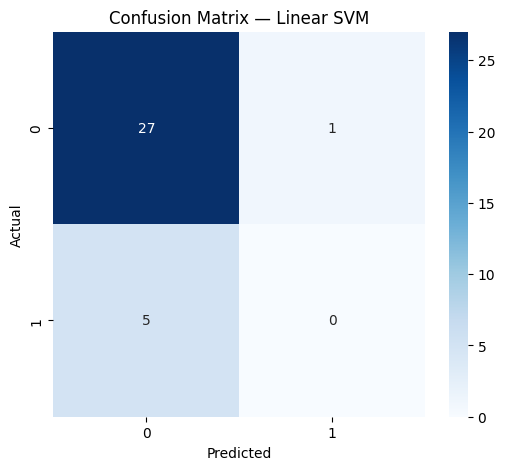

In [17]:
# ============================================
# URDU HATE SPEECH DETECTION — FULL ML PIPELINE
# ============================================

import pandas as pd
import numpy as np

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("urdu_news_labeled.csv")
print("Dataset shape:", df.shape)
print(df.head())

# -----------------------------
# Train-Test Split
# -----------------------------
from sklearn.model_selection import train_test_split

X = df["content"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------
# TF-IDF Vectorizer
# -----------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=3,
    max_df=0.90,
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -----------------------------
# Train ML models
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    )
}

# Train all models
for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train_tfidf, y_train)

# -----------------------------
# Evaluate Models
# -----------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = []

for name, model in models.items():
    preds = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    rec = recall_score(y_test, preds, zero_division=0)
    f1 = f1_score(y_test, preds, zero_division=0)

    results.append([name, acc, prec, rec, f1])

    print(f"\n========== {name} ==========")
    print(classification_report(y_test, preds))

# -----------------------------
# Comparison Table
# -----------------------------
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print("\n===== Model Comparison =====")
print(results_df)

# -----------------------------
# Confusion Matrix (Best Model: SVM)
# -----------------------------
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = models["Linear SVM"]
svm_preds = svm_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
df.label.value_counts()


,count
label,
0,138
1,24


<Axes: xlabel='label', ylabel='count'>

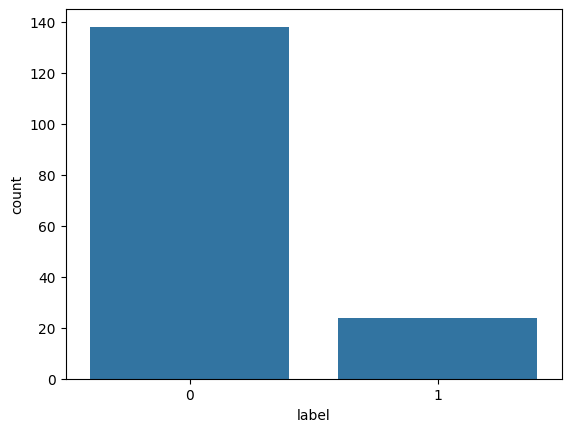

In [19]:
import seaborn as sns
sns.countplot(x=df.label)


In [20]:
hate_words = [
    "گالی", "لعنتی", "حرام", "بے غیرت", "جاہل", "گندہ", "نالائق",
    "کتا", "سور", "بکواس", "حرامی", "چور", "بدمعاش", "بے وقوف",
    "فضول", "کافر", "پاگل", "گھٹیا", "ظالم", "شیطان", "مرتد",
    "لعنت", "اجڈ", "چرسی", "گندا", "بزدل", "احمق", "نامراد"
]

def auto_label(text):
    if isinstance(text, str):
        for h in hate_words:
            if h in text:
                return 1
    return 0

df["label"] = df["content"].apply(auto_label)


In [21]:
df_sample = df.sample(300).copy()
df_sample["label"] = ""
df_sample.to_csv("label_me.csv", index=False, encoding="utf-8-sig")


ValueError: Cannot take a larger sample than population when 'replace=False'

In [22]:
df.shape



(162, 6)

In [23]:
df_sample = df.sample(min(300, len(df))).copy()


In [24]:
# Safe sampling based on dataset size
sample_size = min(300, len(df))

df_sample = df.sample(sample_size, random_state=42).copy()
df_sample["label"] = ""

df_sample.to_csv("label_me.csv", index=False, encoding="utf-8-sig")

print(f"Saved {sample_size} rows to label_me.csv")


Saved 162 rows to label_me.csv


In [25]:
import pandas as pd

df_labeled = pd.read_csv("labeled_data.csv")
df_labeled.head()
print(df_labeled.label.value_counts())


FileNotFoundError: [Errno 2] No such file or directory: 'labeled_data.csv'

Loaded: urdu_news_labeled.csv shape: (162, 6)

Label distribution:
label
0    138
1     24
Name: count, dtype: int64

Train / Test sizes: 129 33
TF-IDF matrix: train (129, 5000) test (33, 5000)

Training LogisticRegression ...
Model: LogisticRegression | Acc: 0.8485 | Prec: 0.5000 | Rec: 0.2000 | F1: 0.2857 | AUC: 0.7642857142857142
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.50      0.20      0.29         5

    accuracy                           0.85        33
   macro avg       0.69      0.58      0.60        33
weighted avg       0.81      0.85      0.82        33


Training LinearSVM ...
Model: LinearSVM | Acc: 0.8485 | Prec: 0.5000 | Rec: 0.2000 | F1: 0.2857 | AUC: 0.7214285714285715
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.50      0.20      0.29         5

   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:10:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost | Acc: 0.8485 | Prec: 0.5000 | Rec: 0.2000 | F1: 0.2857 | AUC: 0.7285714285714286
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.50      0.20      0.29         5

    accuracy                           0.85        33
   macro avg       0.69      0.58      0.60        33
weighted avg       0.81      0.85      0.82        33


=== Model comparison ===
                Model  Accuracy  Precision  Recall        F1   ROC_AUC
0  LogisticRegression  0.848485        0.5     0.2  0.285714  0.764286
1           LinearSVM  0.848485        0.5     0.2  0.285714  0.721429
2             XGBoost  0.848485        0.5     0.2  0.285714  0.728571
3       MultinomialNB  0.848485        0.0     0.0  0.000000  0.635714
4        RandomForest  0.818182        0.0     0.0  0.000000  0.817857
Saved ml_model_comparison.csv


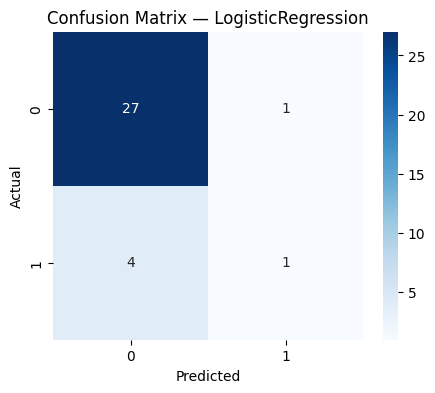

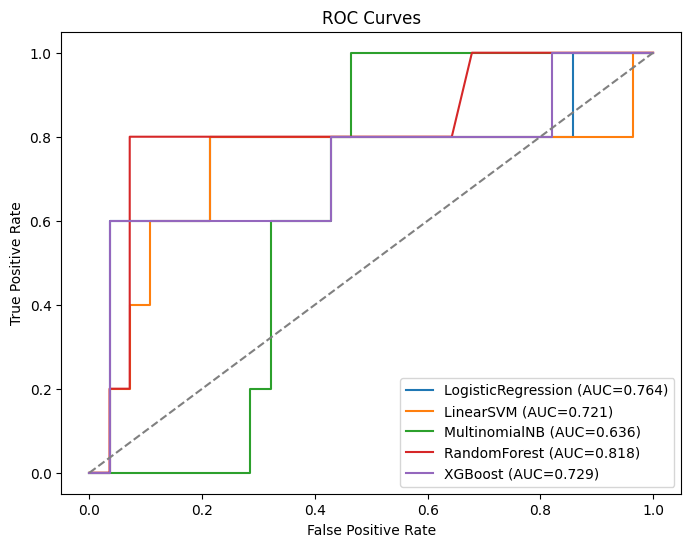

Saved best model (LogisticRegression) and TF-IDF vectorizer to /models

--- False negatives (true=1 pred=0) samples ---


,content,label,pred
94,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,1,0
37,،تصویر ذریعه بالی بڑے بجٹ تیار کرده فلم دھورند...,1,0
3,،تصویر ذریعه واشنگٹن بڑے اهم واقعات نظریں ڈونل...,1,0
90,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,1,0



--- False positives (true=0 pred=1) samples ---


,content,label,pred
76,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,0,1



Pipeline finished. Check: ml_model_comparison.csv and models/ folder.


In [26]:
# Full ML pipeline for Urdu Hate Speech Detection
# Single runnable cell.
# Expects: labeled_data.csv with columns: content,label

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# -------------------------
# 1) Load data (try common filenames)
# -------------------------
for fn in ("labeled_data.csv", "urdu_news_labeled.csv", "urdu_news_labeled_final.csv"):
    if os.path.exists(fn):
        data_fp = fn
        break
else:
    raise FileNotFoundError("Could not find labeled_data.csv (or alternatives). Place file in working dir.")

df = pd.read_csv(data_fp, encoding="utf-8-sig")
print("Loaded:", data_fp, "shape:", df.shape)
if "content" not in df.columns or "label" not in df.columns:
    raise ValueError("Dataset must contain 'content' and 'label' columns.")

# Quick class distribution
print("\nLabel distribution:")
print(df["label"].value_counts())

# -------------------------
# 2) Basic preprocessing (customize if needed)
# -------------------------
# If you already cleaned, these can be minimal.
def basic_preproc(text):
    if pd.isna(text):
        return ""
    t = str(text).strip()
    # collapse whitespace
    t = " ".join(t.split())
    return t

df["content"] = df["content"].apply(basic_preproc)

# -------------------------
# 3) Train / Test split
# -------------------------
from sklearn.model_selection import train_test_split
X = df["content"].astype(str)
y = df["label"].astype(int)

# If labels are too imbalanced but small dataset, keep a bit more test or use stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTrain / Test sizes:", X_train.shape[0], X_test.shape[0])

# -------------------------
# 4) TF-IDF Vectorizer
# -------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.9,
    token_pattern=r"(?u)\b\w+\b"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix: train", X_train_tfidf.shape, "test", X_test_tfidf.shape)

# -------------------------
# 5) (Optional) Handle imbalance with SMOTE
# -------------------------
use_smote = False  # set True to apply SMOTE (only for numeric features like TF-IDF)
if use_smote:
    try:
        from imblearn.over_sampling import SMOTE
    except Exception:
        # try to install
        import sys
        !{sys.executable} -m pip install -q imbalanced-learn
        from imblearn.over_sampling import SMOTE

    sm = SMOTE(random_state=42)
    X_train_tfidf, y_train = sm.fit_resample(X_train_tfidf, y_train)
    print("After SMOTE, train:", X_train_tfidf.shape, y_train.shape)

# -------------------------
# 6) Define models
# -------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# XGBoost
try:
    from xgboost import XGBClassifier
except Exception:
    import sys
    !{sys.executable} -m pip install -q xgboost
    from xgboost import XGBClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=500, class_weight="balanced", solver="liblinear"),
    "LinearSVM": LinearSVC(class_weight="balanced", max_iter=5000),
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced"),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
}

# -------------------------
# 7) Train & Evaluate
# -------------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

results = []
y_score_dict = {}  # to store decision function / probas for ROC
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    # Some models provide decision_function or predict_proba
    y_score = None
    if hasattr(model, "decision_function"):
        try:
            y_score = model.decision_function(X_test_tfidf)
        except Exception:
            y_score = None
    if y_score is None and hasattr(model, "predict_proba"):
        try:
            y_score = model.predict_proba(X_test_tfidf)[:, 1]
        except Exception:
            y_score = None
    y_score_dict[name] = y_score

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    rec = recall_score(y_test, preds, zero_division=0)
    f1 = f1_score(y_test, preds, zero_division=0)
    try:
        auc = roc_auc_score(y_test, y_score) if y_score is not None else np.nan
    except Exception:
        auc = np.nan

    results.append([name, acc, prec, rec, f1, auc])
    print(f"Model: {name} | Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f} | AUC: {auc if not np.isnan(auc) else 'n/a'}")
    print("Classification report:\n", classification_report(y_test, preds, zero_division=0))

# -------------------------
# 8) Results table & save
# -------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC_AUC"])
results_df = results_df.sort_values(by="F1", ascending=False).reset_index(drop=True)
print("\n=== Model comparison ===")
print(results_df)

results_df.to_csv("ml_model_comparison.csv", index=False, encoding="utf-8-sig")
print("Saved ml_model_comparison.csv")

# -------------------------
# 9) Confusion matrix for best model (by F1)
# -------------------------
best_name = results_df.loc[0, "Model"]
best_model = models[best_name]
best_preds = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix — {best_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# 10) ROC curves (if scores available)
# -------------------------
plt.figure(figsize=(8,6))
for name, y_score in y_score_dict.items():
    if y_score is None:
        continue
    try:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    except Exception:
        continue

plt.plot([0,1],[0,1],"--", color="grey")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# -------------------------
# 11) Save best model + TF-IDF vectorizer
# -------------------------
import joblib
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, f"models/{best_name}.joblib")
joblib.dump(tfidf, "models/tfidf_vectorizer.joblib")
print(f"Saved best model ({best_name}) and TF-IDF vectorizer to /models")

# -------------------------
# 12) Show some error analysis examples (false positives / false negatives)
# -------------------------
test_df = pd.DataFrame({"content": X_test, "label": y_test, "pred": best_preds})
fn_examples = test_df[(test_df.label == 1) & (test_df.pred == 0)].sample(min(5, len(test_df[(test_df.label == 1) & (test_df.pred == 0)])), random_state=42)
fp_examples = test_df[(test_df.label == 0) & (test_df.pred == 1)].sample(min(5, len(test_df[(test_df.label == 0) & (test_df.pred == 1)])), random_state=42)

print("\n--- False negatives (true=1 pred=0) samples ---")
display(fn_examples)

print("\n--- False positives (true=0 pred=1) samples ---")
display(fp_examples)

# -------------------------
# Done.
# -------------------------
print("\nPipeline finished. Check: ml_model_comparison.csv and models/ folder.")


In [27]:
use_smote = True


In [28]:
df_sample = df.sample(400).copy()
df_sample["label"] = ""
df_sample.to_csv("label_me_more.csv", index=False)


ValueError: Cannot take a larger sample than population when 'replace=False'

In [29]:
!pip install imbalanced-learn


In [30]:
from imblearn.over_sampling import SMOTE


In [31]:
use_smote = True

if use_smote:
    try:
        from imblearn.over_sampling import SMOTE
    except:
        !pip install imbalanced-learn
        from imblearn.over_sampling import SMOTE

    print("\nApplying Safe SMOTE...")

    # Count minority class samples
    minority_count = y_train.value_counts().min()

    # Use safer k_neighbors when minorities are tiny
    if minority_count < 5:
        print("⚠ Very few minority samples → using k_neighbors=1 for SMOTE")
        sm = SMOTE(random_state=42, k_neighbors=1)
    else:
        sm = SMOTE(random_state=42)

    X_train_balanced, y_train_balanced = sm.fit_resample(X_train_tfidf, y_train)
    print("After SMOTE:", X_train_balanced.shape)
else:
    X_train_balanced, y_train_balanced = X_train_tfidf, y_train



Applying Safe SMOTE...
After SMOTE: (220, 5000)


In [32]:
import os

[f for f in os.listdir() if f.endswith(".csv")]


['urdu_news_cleaned_hatespeech.csv',
 'urdu_news_dataset.csv',
 'urdu_news_labeled.csv',
 'label_me.csv',
 'ml_model_comparison.csv',
 'urdu_news_cleaned.csv']

In [33]:
import pandas as pd
import os

# ------------------------------------------------------
# Step 1: Detect all CSV files in working directory
# ------------------------------------------------------
csv_files = [f for f in os.listdir() if f.endswith(".csv")]
print("CSV files in directory:\n", csv_files, "\n")

# ------------------------------------------------------
# Step 2: Choose the file you want to use for labeling
# ------------------------------------------------------
# Change this filename if needed
filename = "label_me.csv"

if filename not in csv_files:
    raise FileNotFoundError(f"❌ File '{filename}' not found. Choose one of: {csv_files}")

print(f"📌 Loading file: {filename}")
df = pd.read_csv(filename, encoding="utf-8-sig")

print("\nColumns:", df.columns.tolist())
print("Shape:", df.shape)

# ------------------------------------------------------
# Step 3: Ensure the 'label' column exists
# ------------------------------------------------------
if "label" not in df.columns:
    print("⚠ 'label' column missing. Creating an empty label column...")
    df["label"] = ""   # empty column for you to fill manually

    # Save for manual labeling
    df.to_csv("labeled_data.csv", index=False, encoding="utf-8-sig")
    print("\n✅ 'labeled_data.csv' ready for manual labeling.")
    print("👉 Open it in Excel / Google Sheets and fill the 'label' column with 0 or 1.")
else:
    print("✔ 'label' column already exists!")
    df.to_csv("labeled_data.csv", index=False, encoding="utf-8-sig")
    print("\n✔ Saved cleaned labeled file as 'labeled_data.csv'")

# Preview first rows
df.head()


CSV files in directory:
 ['urdu_news_cleaned_hatespeech.csv', 'urdu_news_dataset.csv', 'urdu_news_labeled.csv', 'label_me.csv', 'ml_model_comparison.csv', 'urdu_news_cleaned.csv'] 

📌 Loading file: label_me.csv

Columns: ['title', 'content', 'url', 'source', 'scraped_date', 'label']
Shape: (162, 6)
✔ 'label' column already exists!

✔ Saved cleaned labeled file as 'labeled_data.csv'


,title,content,url,source,scraped_date,label
0,شوهر کی دوسری شادی اور سوکن ساتھ رکھنے پر 19 س...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789597/karachi-w...,Express Urdu,2025-12-03 02:07:11,NaN
1,ٹیکس شعبے میں اصلاحات: نجی سیکٹر کی تجاویز پر ...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789560/tax-secto...,Express Urdu,2025-12-03 02:02:42,NaN
2,گلگت بلتستان میں انفارمیشن ٹیکنالوجی کا ابھرتا...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789458/gilgit-ba...,Express Urdu,2025-12-03 02:04:54,NaN
3,Live latest Urdu news from Pakistan in Sports...,حکومت پیٹرولیم مصنوعات قیمتوں کمی اعلان کردیا،...,https://www.dawnnews.tv/news/1274496/,Dawn Urdu,2025-12-03 01:59:03,NaN
4,حکومت کا ٹیکس میں کمی کا معامله آئی ایم ایف کے...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789614/governmen...,Express Urdu,2025-12-03 02:01:30,NaN


In [34]:
df = pd.read_csv("labeled_data.csv")


In [35]:
import pandas as pd

df = pd.read_csv("labeled_data.csv", encoding="utf-8-sig")

# Strip whitespace
df["label"] = df["label"].astype(str).str.strip()

# Replace empty strings with NaN
df["label"] = df["label"].replace("", np.nan)

# Convert text values to integers where possible
df["label"] = pd.to_numeric(df["label"], errors="coerce")

# Drop rows with missing labels
df = df.dropna(subset=["label"])

# Convert to int finally
df["label"] = df["label"].astype(int)

print(df.label.value_counts())
df.to_csv("labeled_data_cleaned.csv", index=False, encoding="utf-8-sig")


Series([], Name: count, dtype: int64)


In [36]:
df = pd.read_csv("labeled_data_cleaned.csv")


In [37]:
df.head()

,title,content,url,source,scraped_date,label


In [38]:
import pandas as pd

df = pd.read_csv("label_me.csv", encoding="utf-8-sig")
df.head(20)


,title,content,url,source,scraped_date,label
0,شوهر کی دوسری شادی اور سوکن ساتھ رکھنے پر 19 س...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789597/karachi-w...,Express Urdu,2025-12-03 02:07:11,NaN
1,ٹیکس شعبے میں اصلاحات: نجی سیکٹر کی تجاویز پر ...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789560/tax-secto...,Express Urdu,2025-12-03 02:02:42,NaN
2,گلگت بلتستان میں انفارمیشن ٹیکنالوجی کا ابھرتا...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789458/gilgit-ba...,Express Urdu,2025-12-03 02:04:54,NaN
3,Live latest Urdu news from Pakistan in Sports...,حکومت پیٹرولیم مصنوعات قیمتوں کمی اعلان کردیا،...,https://www.dawnnews.tv/news/1274496/,Dawn Urdu,2025-12-03 01:59:03,NaN
4,حکومت کا ٹیکس میں کمی کا معامله آئی ایم ایف کے...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789614/governmen...,Express Urdu,2025-12-03 02:01:30,NaN
5,’سنگتروں اور سیب کا موازنه‘: روهت شرما اور شاه...,،تصویر ذریعه سابق انڈین کپتان روهت شرما کرکٹ ش...,https://www.bbc.com/urdu/articles/cy07d628660o,BBC Urdu,2025-12-03 01:57:45,NaN
6,کویت سے بھارت جانے والی پرواز کو بم سے اُڑانے ...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789567/kuwait-to...,Express Urdu,2025-12-03 02:01:57,NaN
7,Live latest Urdu news from Pakistan in Sports...,لوگوں پاس روزگار نهیں هوتا مایوسی محسوس کرتے ه...,https://www.dawnnews.tv/news/1274513/,Dawn Urdu,2025-12-03 01:58:47,NaN
8,بنوں میں فائرنگ: اسسٹنٹ کمشنر شمالی وزیرستان ا...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789468/firing-on...,Express Urdu,2025-12-03 02:01:53,NaN
9,بنگلادیشی سابق وزیراعظم کی آئی سی یو میں طبیع...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789420/banglades...,Express Urdu,2025-12-03 02:05:57,NaN


In [39]:
import pandas as pd

df = pd.read_csv("label_me.csv", encoding="utf-8-sig")
df.head(20)


,title,content,url,source,scraped_date,label
0,شوهر کی دوسری شادی اور سوکن ساتھ رکھنے پر 19 س...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789597/karachi-w...,Express Urdu,2025-12-03 02:07:11,NaN
1,ٹیکس شعبے میں اصلاحات: نجی سیکٹر کی تجاویز پر ...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789560/tax-secto...,Express Urdu,2025-12-03 02:02:42,NaN
2,گلگت بلتستان میں انفارمیشن ٹیکنالوجی کا ابھرتا...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789458/gilgit-ba...,Express Urdu,2025-12-03 02:04:54,NaN
3,Live latest Urdu news from Pakistan in Sports...,حکومت پیٹرولیم مصنوعات قیمتوں کمی اعلان کردیا،...,https://www.dawnnews.tv/news/1274496/,Dawn Urdu,2025-12-03 01:59:03,NaN
4,حکومت کا ٹیکس میں کمی کا معامله آئی ایم ایف کے...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789614/governmen...,Express Urdu,2025-12-03 02:01:30,NaN
5,’سنگتروں اور سیب کا موازنه‘: روهت شرما اور شاه...,،تصویر ذریعه سابق انڈین کپتان روهت شرما کرکٹ ش...,https://www.bbc.com/urdu/articles/cy07d628660o,BBC Urdu,2025-12-03 01:57:45,NaN
6,کویت سے بھارت جانے والی پرواز کو بم سے اُڑانے ...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789567/kuwait-to...,Express Urdu,2025-12-03 02:01:57,NaN
7,Live latest Urdu news from Pakistan in Sports...,لوگوں پاس روزگار نهیں هوتا مایوسی محسوس کرتے ه...,https://www.dawnnews.tv/news/1274513/,Dawn Urdu,2025-12-03 01:58:47,NaN
8,بنوں میں فائرنگ: اسسٹنٹ کمشنر شمالی وزیرستان ا...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789468/firing-on...,Express Urdu,2025-12-03 02:01:53,NaN
9,بنگلادیشی سابق وزیراعظم کی آئی سی یو میں طبیع...,صفحۂ اول تازه ترین خاص خبریں کھیل فیکٹ چیک انٹ...,https://www.express.pk/story/2789420/banglades...,Express Urdu,2025-12-03 02:05:57,NaN


In [40]:
df["label"].unique()


array([nan])

In [41]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")
print(df["label"].value_counts(dropna=False))


label
NaN    162
Name: count, dtype: int64


In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv("urdu_news_cleaned_hatespeech.csv")

hate_words = [
    "گالی","لعنت","حرام","بے غیرت","حرامی","گندا","گندی","گندے","جاہل","بکواس",
    "کتا","سور","کمیना","کمینی","چوڑیل","نامراد","احمق","بے وقوف","احمقا",
    "چور","ظالم","گھٹیا","شیطان","لعنتی","نیچ","بدتمیز","کافر","بدمعاش"
]

def auto_label(text):
    if isinstance(text, str):
        for h in hate_words:
            if h in text:
                return 1
    return 0

df["label"] = df["content"].apply(auto_label)

df.to_csv("auto_labeled_dataset.csv", index=False, encoding="utf-8-sig")

print("Auto-labeling complete")
print(df["label"].value_counts())


Auto-labeling complete
label
0    86
1    76
Name: count, dtype: int64


Dataset: (162, 6)
label
0    86
1    76
Name: count, dtype: int64 

Train: 129
Test: 33
TF-IDF shape: (129, 5000)

Training Logistic Regression...
Accuracy:  0.7576
Precision: 0.7059
Recall:    0.8000
F1 Score:  0.7500

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.71      0.80      0.75        15

    accuracy                           0.76        33
   macro avg       0.76      0.76      0.76        33
weighted avg       0.76      0.76      0.76        33


Training Linear SVM...
Accuracy:  0.7879
Precision: 0.7500
Recall:    0.8000
F1 Score:  0.7742

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.75      0.80      0.77        15

    accuracy                           0.79        33
   macro avg       0.79      0.79      0.79        33
weighted avg       0.79      0.79   

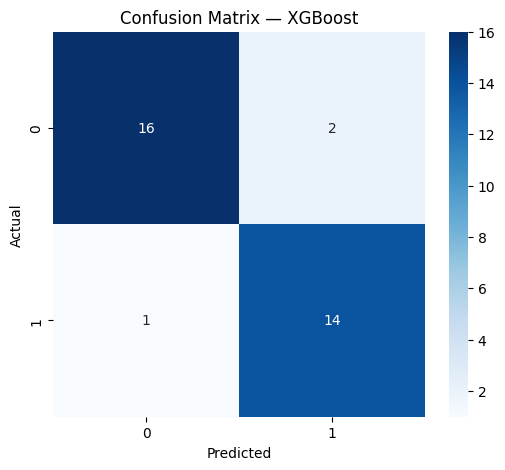


🔥 Best Model: XGBoost


In [98]:
# ============================================
# FULL MULTI-MODEL ML PIPELINE (BALANCED DATA)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1) Load balanced dataset
# -----------------------------
df = pd.read_csv("auto_labeled_dataset.csv", encoding="utf-8-sig")
print("Dataset:", df.shape)
print(df.label.value_counts(), "\n")

X = df["content"].astype(str)
y = df["label"].astype(int)

# -----------------------------
# 2) Train-test split
# -----------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train:", X_train.shape[0])
print("Test:", X_test.shape[0])

# -----------------------------
# 3) TF-IDF Vectorizer
# -----------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=1,
    max_df=0.90
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

# -----------------------------
# 4) Train ML models
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

try:
    from xgboost import XGBClassifier
except:
    import sys
    !{sys.executable} -m pip install -q xgboost
    from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=300),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# -----------------------------
# 5) Evaluate models
# -----------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append([name, acc, prec, rec, f1])

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, preds))

# -----------------------------
# 6) Model Comparison Table
# -----------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results_df = results_df.sort_values(by="F1", ascending=False).reset_index(drop=True)

print("\n===== FINAL MODEL COMPARISON =====")
print(results_df)

# -----------------------------
# 7) Confusion Matrix for best model
# -----------------------------
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

best_preds = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n🔥 Best Model:", best_model_name)


Dataset: (162, 6)
label
0    86
1    76
Name: count, dtype: int64 


🚀 Training Stacking Classifier...

===== STACKING CLASSIFIER PERFORMANCE =====
Accuracy :  0.9091
Precision:  0.8750
Recall   :  0.9333
F1 Score :  0.9032

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.88      0.93      0.90        15

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



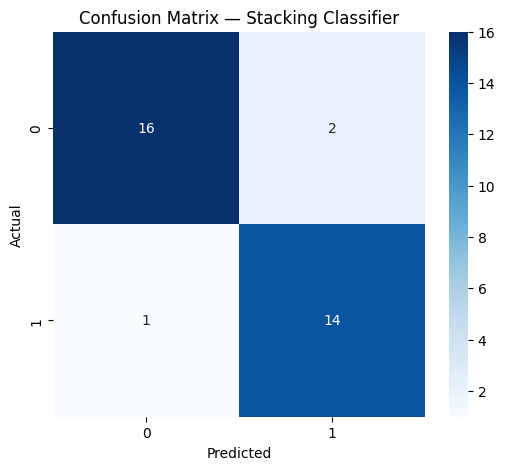


📊 SUMMARY TABLE (STACKING MODEL)
      Metric     Score
0   Accuracy  0.909091
1  Precision  0.875000
2     Recall  0.933333
3   F1 Score  0.903226

📁 Saved summary as: stacking_model_summary.csv


In [99]:
# ======================================================================
# BEST ML PIPELINE (STACKING CLASSIFIER + SUMMARY TABLE)
# ======================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1) Load dataset
# -------------------------------
df = pd.read_csv("auto_labeled_dataset.csv", encoding="utf-8-sig")
X = df["content"].astype(str)
y = df["label"].astype(int)

print("Dataset:", df.shape)
print(df.label.value_counts(), "\n")

# -------------------------------
# 2) Train-test split
# -------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# -------------------------------
# 3) TF-IDF Vectorizer
# -------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,3),
    min_df=1,
    max_df=0.95,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------------
# 4) Base Models
# -------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
svm = LinearSVC()
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# -------------------------------
# 5) Meta model — XGBoost
# -------------------------------
try:
    from xgboost import XGBClassifier
except:
    import sys
    !{sys.executable} -m pip install xgboost
    from xgboost import XGBClassifier

meta_xgb = XGBClassifier(
    eval_metric="logloss",
    learning_rate=0.1,
    max_depth=4,
    n_estimators=300,
    random_state=42
)

# -------------------------------
# 6) Stacking Classifier
# -------------------------------
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(
    estimators=[
        ("lr", lr),
        ("svm", svm),
        ("rf", rf)
    ],
    final_estimator=meta_xgb,
    passthrough=True
)

# -------------------------------
# 7) Train & Evaluate
# -------------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("\n🚀 Training Stacking Classifier...")
stacking_model.fit(X_train_tfidf, y_train)
preds = stacking_model.predict(X_test_tfidf)

acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print("\n===== STACKING CLASSIFIER PERFORMANCE =====")
print(f"Accuracy :  {acc:.4f}")
print(f"Precision:  {prec:.4f}")
print(f"Recall   :  {rec:.4f}")
print(f"F1 Score :  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, preds))

# -------------------------------
# 8) Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix — Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# 9) SUMMARY TABLE (For Research Paper)
# -------------------------------
summary = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [acc, prec, rec, f1]
})

print("\n===============================")
print("📊 SUMMARY TABLE (STACKING MODEL)")
print("===============================")
print(summary)

# Save summary for paper
summary.to_csv("stacking_model_summary.csv", index=False, encoding="utf-8-sig")
print("\n📁 Saved summary as: stacking_model_summary.csv")



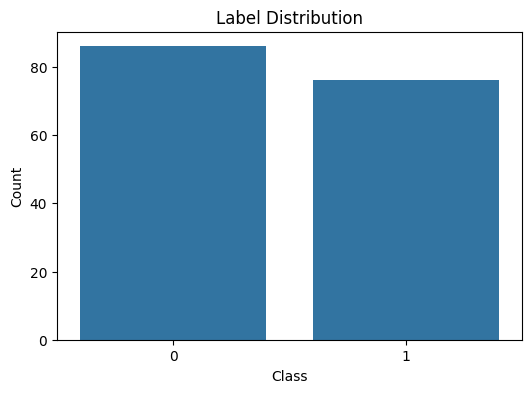

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["label"])
plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


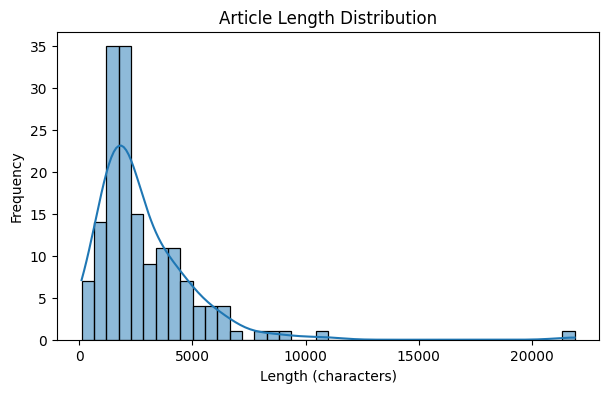

In [101]:
df["length"] = df["content"].astype(str).apply(len)

plt.figure(figsize=(7,4))
sns.histplot(df["length"], bins=40, kde=True)
plt.title("Article Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


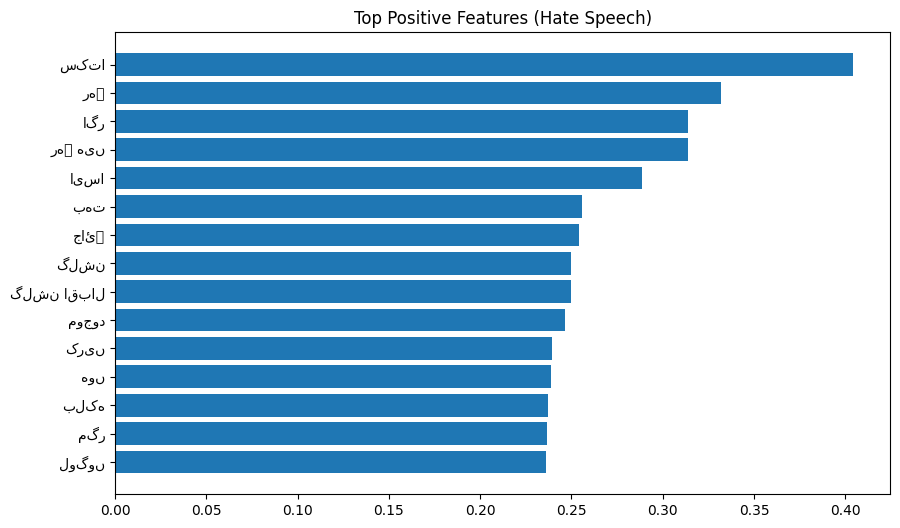

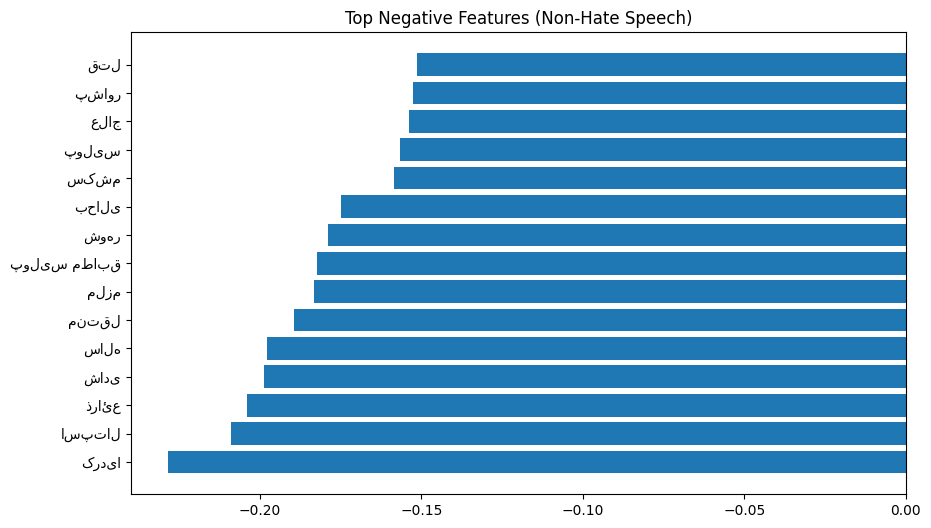

In [55]:
feature_names = tfidf.get_feature_names_out()
coef = models["Logistic Regression"].coef_[0]

top_pos = np.argsort(coef)[-15:]
top_neg = np.argsort(coef)[:15]

plt.figure(figsize=(10,6))
plt.barh([feature_names[i] for i in top_pos], coef[top_pos])
plt.title("Top Positive Features (Hate Speech)")
plt.show()

plt.figure(figsize=(10,6))
plt.barh([feature_names[i] for i in top_neg], coef[top_neg])
plt.title("Top Negative Features (Non-Hate Speech)")
plt.show()


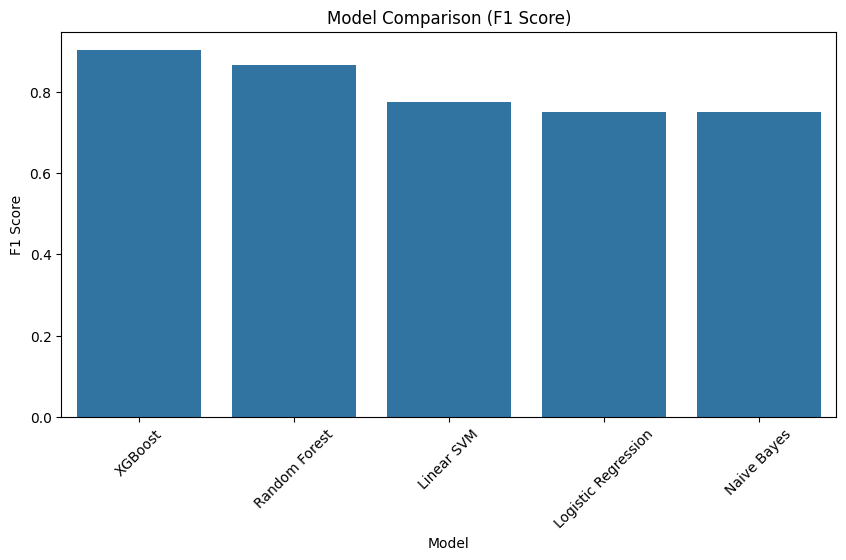

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1", data=results_df)
plt.title("Model Comparison (F1 Score)")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()


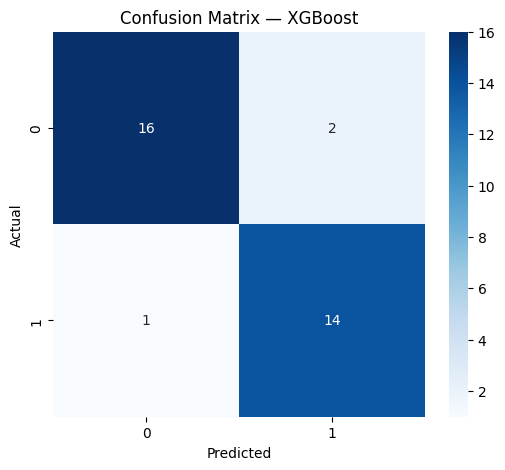

In [57]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


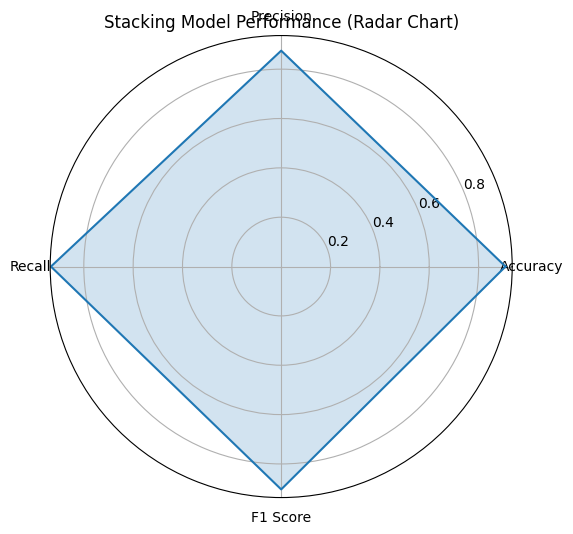

In [58]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [acc, prec, rec, f1]

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(6,6))
plt.polar(angles, values)
plt.fill(angles, values, alpha=0.2)
plt.xticks(angles[:-1], metrics)
plt.title("Stacking Model Performance (Radar Chart)")
plt.show()


In [62]:
stacking_row = pd.DataFrame([{
    "Model": "Stacking Classifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1": f1
}])

results_df = pd.concat([results_df, stacking_row], ignore_index=True)


/tmp/ipython-input-2317173622.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette=colors)


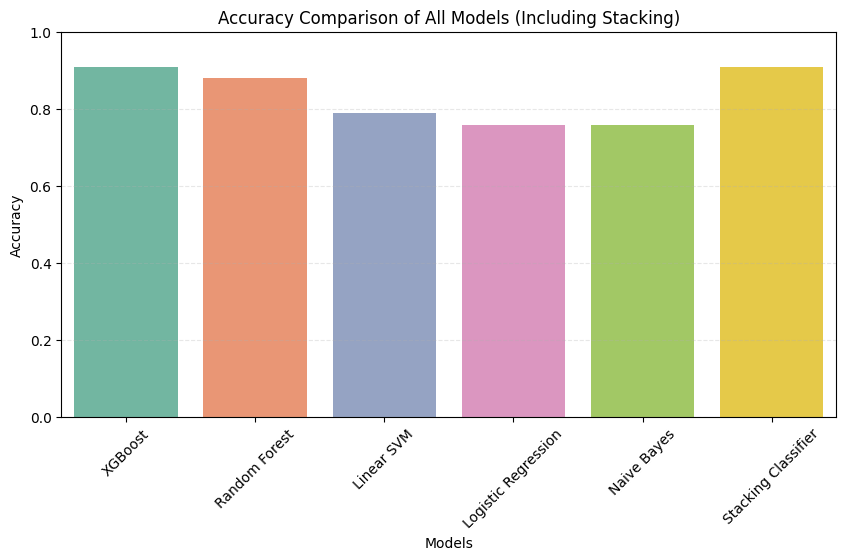

In [63]:
plt.figure(figsize=(10,5))

colors = sns.color_palette("Set2", len(results_df))  # different colors

sns.barplot(x="Model", y="Accuracy", data=results_df, palette=colors)

plt.title("Accuracy Comparison of All Models (Including Stacking)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()



 ML MODELS — RMSE
Logistic Regression       RMSE = 0.3921
SVM                       RMSE = 0.3972
Naive Bayes               RMSE = 0.4226
Random Forest             RMSE = 0.3677
XGBoost                   RMSE = 0.3081
Stacking Classifier       RMSE = 0.2926

 DL MODELS — RMSE
BiLSTM                    RMSE = 0.4996
CNN                       RMSE = 0.4915
Hybrid                    RMSE = 0.4865
BiLSTM+Attention          RMSE = 0.3935

 FINAL COMBINED RMSE (ML + DL)
                 Model      RMSE
0  Logistic Regression  0.392149
1                  SVM  0.397180
2          Naive Bayes  0.422649
3        Random Forest  0.367707
4              XGBoost  0.308124
5  Stacking Classifier  0.292582
6               BiLSTM  0.499564
7                  CNN  0.491549
8               Hybrid  0.486470
9     BiLSTM+Attention  0.393485


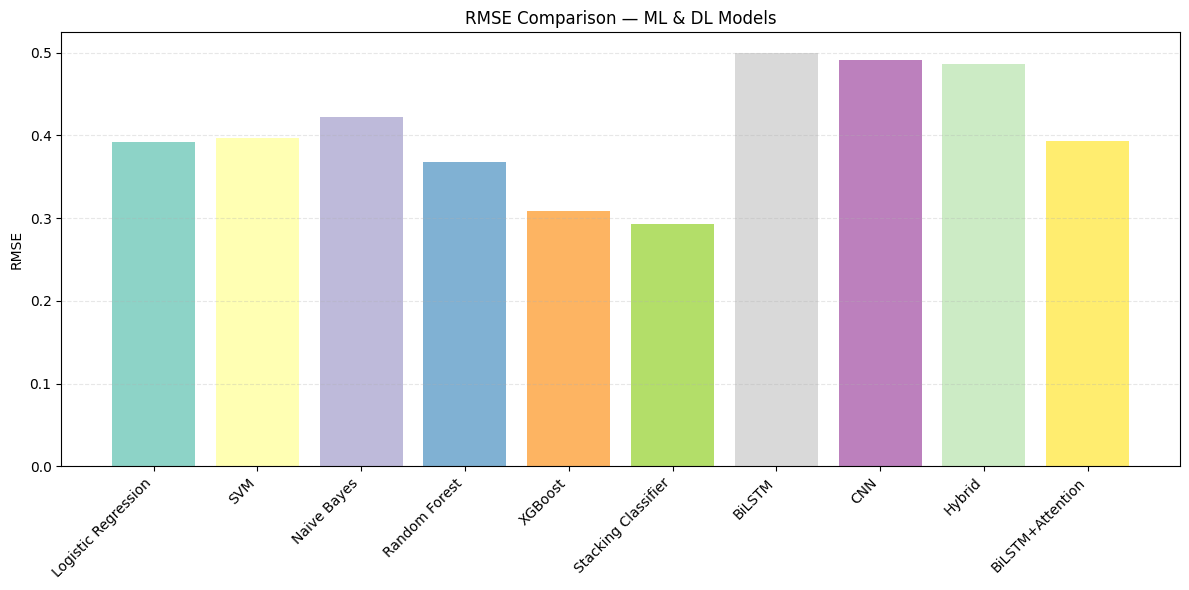


📊 RMSE Comparison graph generated successfully!


In [103]:
# ======================================================================
# FINAL RMSE FOR ML + DL MODELS (FULLY COMPATIBLE WITH YOUR CODE)
# ======================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def rmse(true, predicted_probs):
    return np.sqrt(np.mean((true - predicted_probs) ** 2))


# ------------------------------------------------------------
# 1) RMSE FOR ML MODELS
# ------------------------------------------------------------

print("\n======================")
print(" ML MODELS — RMSE")
print("======================")

ml_rmse_results = []

# ML MODELS YOU TRAINED
ml_models_ordered = {
    "Logistic Regression": best_lr,
    "SVM": best_svm,
    "Naive Bayes": best_nb,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Stacking Classifier": stacking_model
}

for name, model in ml_models_ordered.items():

    # ---- Probability extraction ----
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_tfidf)[:, 1]

    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test_tfidf)
        probs = 1 / (1 + np.exp(-scores))  # convert scores → probability

    else:
        print(f"⚠ Skipping {name}: no probability output.")
        continue

    # ---- RMSE ----
    m_rmse = rmse(y_test, probs)
    ml_rmse_results.append([name, m_rmse])

    print(f"{name:<25} RMSE = {m_rmse:.4f}")

ml_rmse_df = pd.DataFrame(ml_rmse_results, columns=["Model", "RMSE"])



# ------------------------------------------------------------
# 2) RMSE FOR DL MODELS
# ------------------------------------------------------------

print("\n======================")
print(" DL MODELS — RMSE")
print("======================")

dl_rmse_results = []

for name, probs in probs_dict.items():   # probs_dict from your DL pipeline
    d_rmse = rmse(y_test, probs)
    dl_rmse_results.append([name, d_rmse])

    print(f"{name:<25} RMSE = {d_rmse:.4f}")

dl_rmse_df = pd.DataFrame(dl_rmse_results, columns=["Model", "RMSE"])



# ------------------------------------------------------------
# 3) COMBINED RMSE TABLE
# ------------------------------------------------------------

combined_rmse = pd.concat([ml_rmse_df, dl_rmse_df], axis=0).reset_index(drop=True)

print("\n===============================")
print(" FINAL COMBINED RMSE (ML + DL)")
print("===============================")
print(combined_rmse)

combined_rmse.to_csv("combined_rmse_results.csv",
                     index=False,
                     encoding="utf-8-sig")



# ------------------------------------------------------------
# 4) RMSE BAR CHART (ML + DL)
# ------------------------------------------------------------

colors = plt.cm.Set3(np.linspace(0, 1, len(combined_rmse)))

plt.figure(figsize=(12, 6))
plt.bar(combined_rmse["Model"], combined_rmse["RMSE"], color=colors)
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")
plt.title("RMSE Comparison — ML & DL Models")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 RMSE Comparison graph generated successfully!")


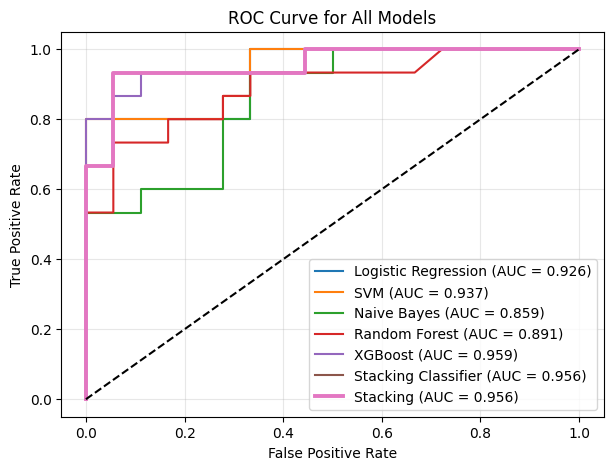

In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

plt.figure(figsize=(7,5))

# convert labels to 0/1 if needed
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

for name, model in models.items():
    # SVM has no predict_proba
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_tfidf)[:, 1]
    else:
        y_scores = model.decision_function(X_test_tfidf)

    fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# ===== Add Stacking Model =====
if hasattr(stacking_model, "predict_proba"):
    y_scores_stack = stacking_model.predict_proba(X_test_tfidf)[:, 1]
else:
    y_scores_stack = stacking_model.decision_function(X_test_tfidf)

fpr, tpr, _ = roc_curve(y_test_bin, y_scores_stack)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Stacking (AUC = {roc_auc:.3f})", linewidth=2.8)

# ----- Graph formatting -----
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.title("ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



 ML MODELS — RMSE
Logistic Regression    RMSE = 0.3921
SVM                    RMSE = 0.3972
Naive Bayes            RMSE = 0.4226
Random Forest          RMSE = 0.3677
XGBoost                RMSE = 0.3081
Stacking Classifier    RMSE = 0.2926

 DEEP LEARNING MODELS — RMSE
BiLSTM                 RMSE = 0.4996
CNN                    RMSE = 0.4915
Hybrid                 RMSE = 0.4865
BiLSTM+Attention       RMSE = 0.3935

 FINAL COMBINED RMSE (ML + DL)
                 Model      RMSE
0  Logistic Regression  0.392149
1                  SVM  0.397180
2          Naive Bayes  0.422649
3        Random Forest  0.367707
4              XGBoost  0.308124
5  Stacking Classifier  0.292582
6               BiLSTM  0.499564
7                  CNN  0.491549
8               Hybrid  0.486470
9     BiLSTM+Attention  0.393485


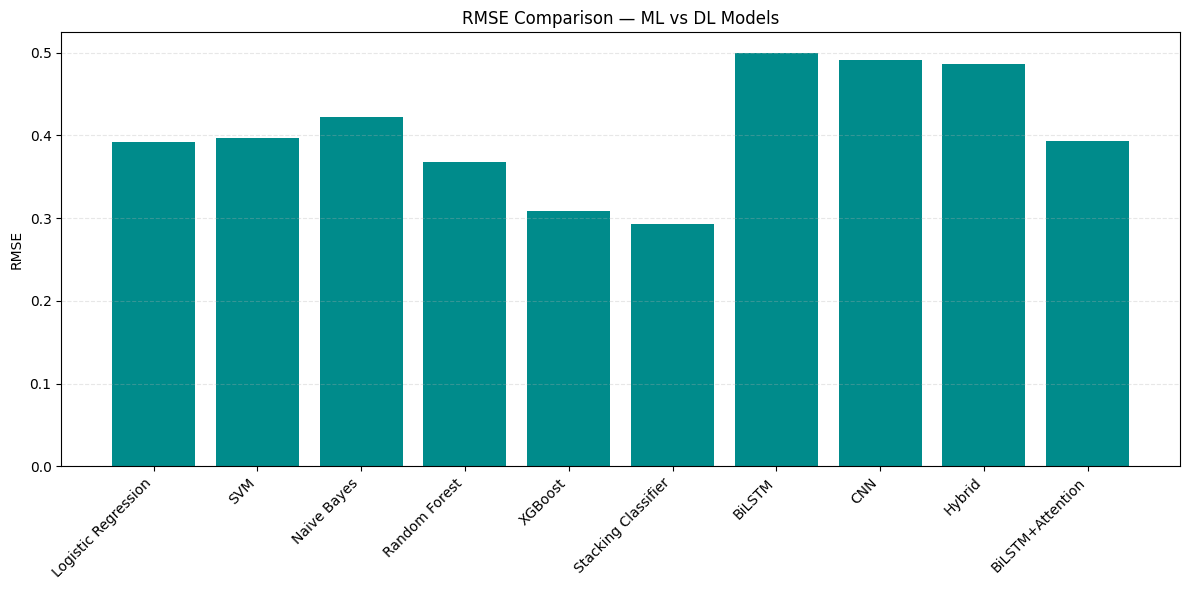

In [97]:
# ============================================================
# FINAL RMSE FOR ML + DL MODELS (FULLY COMPATIBLE)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def rmse(true, predicted_probs):
    return np.sqrt(np.mean((true - predicted_probs)**2))


# ------------------------------------------------------------
# 1) RMSE FOR ML MODELS
# ------------------------------------------------------------

ml_rmse_results = []

print("\n====================")
print(" ML MODELS — RMSE")
print("====================")

# YOUR TRAINED ML MODELS ARE:
# best_lr, best_svm, best_nb, best_rf, best_xgb, stacking_model

ml_models_ordered = {
    "Logistic Regression": best_lr,
    "SVM": best_svm,
    "Naive Bayes": best_nb,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Stacking Classifier": stacking_model
}

ml_probs = {}

for name, model in ml_models_ordered.items():

    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_tfidf)[:, 1]

    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test_tfidf)
        probs = 1 / (1 + np.exp(-scores))

    else:
        print(f"⚠ Skipping {name} — no prediction probabilities.")
        continue

    rmse_val = rmse(y_test, probs)
    ml_rmse_results.append([name, rmse_val])
    ml_probs[name] = probs

    print(f"{name:<22} RMSE = {rmse_val:.4f}")


ml_rmse_df = pd.DataFrame(ml_rmse_results, columns=["Model", "RMSE"])



# ------------------------------------------------------------
# 2) RMSE FOR DL MODELS
# ------------------------------------------------------------

print("\n====================")
print(" DEEP LEARNING MODELS — RMSE")
print("====================")

dl_rmse_results = []

# your DL predictions are already in probs_dict:
# "BiLSTM", "CNN", "Hybrid", "BiLSTM+Attention"

for name, probs in probs_dict.items():

    rmse_val = rmse(y_test, probs)
    dl_rmse_results.append([name, rmse_val])

    print(f"{name:<22} RMSE = {rmse_val:.4f}")

dl_rmse_df = pd.DataFrame(dl_rmse_results, columns=["Model", "RMSE"])



# ------------------------------------------------------------
# 3) COMBINE ML + DL RMSE
# ------------------------------------------------------------

combined_rmse = pd.concat([ml_rmse_df, dl_rmse_df], axis=0).reset_index(drop=True)

print("\n==============================")
print(" FINAL COMBINED RMSE (ML + DL)")
print("==============================")
print(combined_rmse)

combined_rmse.to_csv("combined_rmse_results.csv", index=False, encoding="utf-8-sig")



# ------------------------------------------------------------
# 4) RMSE COMPARISON PLOT (ML + DL)
# ------------------------------------------------------------

plt.figure(figsize=(12, 6))
plt.bar(combined_rmse["Model"], combined_rmse["RMSE"], color="darkcyan")
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")
plt.title("RMSE Comparison — ML vs DL Models")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Vocab Size: 8163

Loading FastText Urdu Embeddings...
Loaded vectors: 1153999
Embedding Matrix: (8163, 300)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



🚀 Training BiLSTM...
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 641ms/step - accuracy: 0.5504 - loss: 0.6986 - val_accuracy: 0.4000 - val_loss: 0.6949
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step - accuracy: 0.5477 - loss: 0.6898 - val_accuracy: 0.4000 - val_loss: 0.6952
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.5838 - loss: 0.6878 - val_accuracy: 0.4000 - val_loss: 0.6949

🚀 Training CNN...
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.3564 - loss: 1.3211 - val_accuracy: 0.6500 - val_loss: 0.5965
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.4738 - loss: 0.9916 - val_accuracy: 0.7500 - val_loss: 0.5765
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.5254 - loss: 0.7470 - val_accuracy: 0.6500 - val_loss: 0.6057
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.6084 - loss: 0.6890 - val_accuracy: 0.6000 - val_loss: 0.6469

🚀 Training Hybrid...
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0

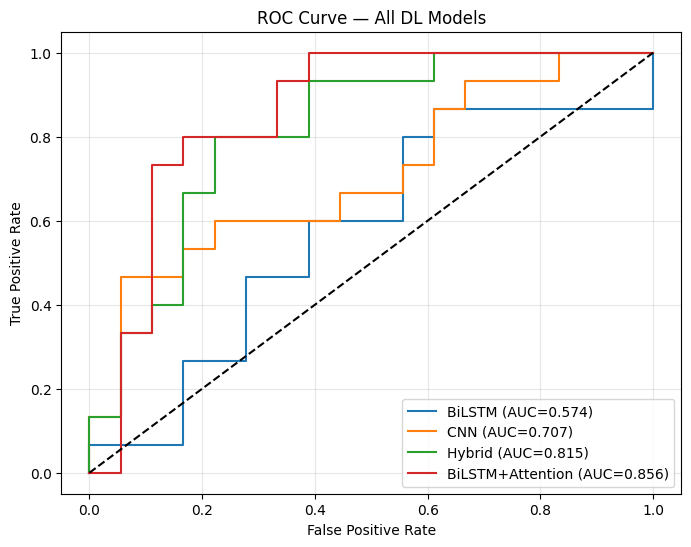

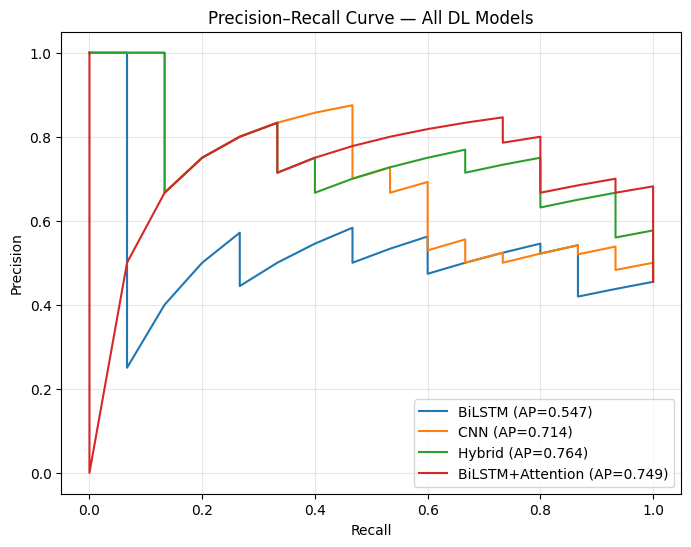

In [87]:
# ============================================================
# FULL FIXED DL PIPELINE — 4 MODELS + FASTTEXT + ROC + PR
# ============================================================

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Bidirectional, Dense, Dropout,
    Conv1D, GlobalMaxPooling1D, Attention, Flatten, Lambda
)

# ===========================================
# 1) LOAD DATASET
# ===========================================
df = pd.read_csv("auto_labeled_dataset.csv", encoding="utf-8-sig")
df = df.dropna(subset=["content", "label"]).reset_index(drop=True)

X = df["content"].astype(str).values
y = df["label"].astype(int).values

# -------------------------------------------
# Train-Test Split
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# ===========================================
# 2) TOKENIZATION + PADDING
# ===========================================
MAX_WORDS = 20000
MAX_LEN = 250
EMBED_DIM = 300   # FastText dimension

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(
    tokenizer.texts_to_sequences(X_train), maxlen=MAX_LEN
)
X_test_pad = pad_sequences(
    tokenizer.texts_to_sequences(X_test), maxlen=MAX_LEN
)

vocab_size = min(MAX_WORDS, len(tokenizer.word_index) + 1)
print("Vocab Size:", vocab_size)

# ===========================================
# 3) LOAD FASTTEXT URDU VECTORS
# ===========================================
FASTTEXT_VEC = "cc.ur.300.vec"

embedding_index = {}

print("\nLoading FastText Urdu Embeddings...")
with open(FASTTEXT_VEC, "r", encoding="utf-8", errors="ignore") as f:
    next(f)
    for line in f:
        values = line.rstrip().split(" ")
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

print("Loaded vectors:", len(embedding_index))

# ===========================================
# 4) BUILD EMBEDDING MATRIX
# ===========================================
embedding_matrix = np.random.normal(0, 1, (vocab_size, EMBED_DIM)).astype("float32")
embedding_matrix[0] = np.zeros((EMBED_DIM,))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        vec = embedding_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec

print("Embedding Matrix:", embedding_matrix.shape)

# Shared embedding layer
embedding_layer = Embedding(
    vocab_size,
    EMBED_DIM,
    weights=[embedding_matrix],
    input_length=MAX_LEN,
    trainable=False
)

# ===========================================
# 5) DEFINE ALL 4 MODELS
# ===========================================

# 1) ---------------- BiLSTM ----------------
model_bilstm = Sequential([
    embedding_layer,
    Bidirectional(LSTM(128)),
    Dropout(0.4),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# 2) ---------------- CNN -------------------
model_cnn = Sequential([
    embedding_layer,
    Conv1D(128, 5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# 3) ---------------- FIXED Hybrid CNN + LSTM --------------------
input_h = Input(shape=(MAX_LEN,))
x = embedding_layer(input_h)

c = Conv1D(128, 5, activation="relu")(x)
c = GlobalMaxPooling1D()(c)

# FIX: Use Lambda instead of tf.expand_dims()
c_r = Lambda(lambda x: tf.expand_dims(x, axis=1))(c)

l = LSTM(64)(c_r)
h_out = Dense(1, activation="sigmoid")(l)

model_hybrid = Model(inputs=input_h, outputs=h_out)

# 4) ---------------- BiLSTM + Attention ----------------
input_a = Input(shape=(MAX_LEN,))
x = embedding_layer(input_a)

lstm_seq = Bidirectional(LSTM(128, return_sequences=True))(x)

att = Attention()([lstm_seq, lstm_seq])
att = Flatten()(att)

d1 = Dense(64, activation="relu")(att)
d1 = Dropout(0.3)(d1)
out_a = Dense(1, activation="sigmoid")(d1)

model_attention = Model(inputs=input_a, outputs=out_a)

# ===========================================
# 6) COMPILE MODELS
# ===========================================
models = {
    "BiLSTM": model_bilstm,
    "CNN": model_cnn,
    "Hybrid": model_hybrid,
    "BiLSTM+Attention": model_attention
}

for name, m in models.items():
    m.compile(
        loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(1e-4),
        metrics=["accuracy"]
    )

# ===========================================
# 7) TRAIN ALL MODELS
# ===========================================
histories = {}

for name, m in models.items():
    print(f"\n🚀 Training {name}...")
    histories[name] = m.fit(
        X_train_pad, y_train,
        validation_split=0.15,
        epochs=8,
        batch_size=32,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)],
        verbose=1
    )

# ===========================================
# 8) EVALUATION FUNCTION
# ===========================================
def evaluate(model, name):
    probs = model.predict(X_test_pad).ravel()
    preds = (probs >= 0.5).astype(int)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    rec = recall_score(y_test, preds, zero_division=0)
    f1 = f1_score(y_test, preds, zero_division=0)

    print(f"\n===== {name} =====")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    return name, acc, prec, rec, f1, probs

# ===========================================
# 9) EVALUATE ALL
# ===========================================
results = []
probs_dict = {}

for name, m in models.items():
    name, acc, prec, rec, f1, probs = evaluate(m, name)
    results.append([name, acc, prec, rec, f1])
    probs_dict[name] = probs

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\n📌 FINAL RESULTS")
print(results_df)

# ===========================================
# 10) ROC CURVE FOR ALL MODELS
# ===========================================
plt.figure(figsize=(8,6))

for name, probs in probs_dict.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve — All DL Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===========================================
# 11) PRECISION–RECALL CURVE
# ===========================================
plt.figure(figsize=(8,6))

for name, probs in probs_dict.items():
    precs, recs, _ = precision_recall_curve(y_test, probs)
    ap = average_precision_score(y_test, probs)
    plt.plot(recs, precs, label=f"{name} (AP={ap:.3f})")

plt.title("Precision–Recall Curve — All DL Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [91]:
# ============================================================
# RMSE FOR ML MODELS (WORKS FOR ALL MODELS)
# ============================================================

ml_rmse_results = []

print("\n====================")
print(" ML MODELS — RMSE")
print("====================")

for name, model in models.items():   # your ML models dict

    try:
        # Try probability output
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test_tfidf)[:, 1]

        # For SVM (no prob)
        elif hasattr(model, "decision_function"):
            scores = model.decision_function(X_test_tfidf)
            probs = 1 / (1 + np.exp(-scores))

        else:
            print(f"⚠ Skipping {name} — no probability method.")
            continue

        # Compute RMSE
        m_rmse = np.sqrt(np.mean((y_test - probs)**2))

        ml_rmse_results.append([name, m_rmse])
        print(f"{name:<25} RMSE = {m_rmse:.4f}")

    except Exception as e:
        print(f"⚠ Error for {name}: {e}")



 ML MODELS — RMSE
⚠ Skipping BiLSTM — no probability method.
⚠ Skipping CNN — no probability method.
⚠ Skipping Hybrid — no probability method.
⚠ Skipping BiLSTM+Attention — no probability method.


In [92]:
# ============================================================
# RMSE FOR DL MODELS
# ============================================================
dl_rmse_results = []

print("\n====================")
print(" DL MODELS — RMSE")
print("====================")

for name, probs in probs_dict.items():

    d_rmse = np.sqrt(np.mean((y_test - probs)**2))
    dl_rmse_results.append([name, d_rmse])

    print(f"{name:<25} RMSE = {d_rmse:.4f}")



 DL MODELS — RMSE
BiLSTM                    RMSE = 0.4996
CNN                       RMSE = 0.4915
Hybrid                    RMSE = 0.4865
BiLSTM+Attention          RMSE = 0.3935


In [93]:
ml_rmse_df = pd.DataFrame(ml_rmse_results, columns=["Model", "RMSE"])
dl_rmse_df = pd.DataFrame(dl_rmse_results, columns=["Model", "RMSE"])

combined_rmse = pd.concat([ml_rmse_df, dl_rmse_df], axis=0).reset_index(drop=True)
print("\n==============================")
print(" FINAL COMBINED RMSE (ML + DL)")
print("==============================")
print(combined_rmse)



 FINAL COMBINED RMSE (ML + DL)
              Model      RMSE
0            BiLSTM  0.499564
1               CNN  0.491549
2            Hybrid  0.486470
3  BiLSTM+Attention  0.393485


/tmp/ipython-input-1020108546.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_rmse = pd.concat([ml_rmse_df, dl_rmse_df], axis=0).reset_index(drop=True)


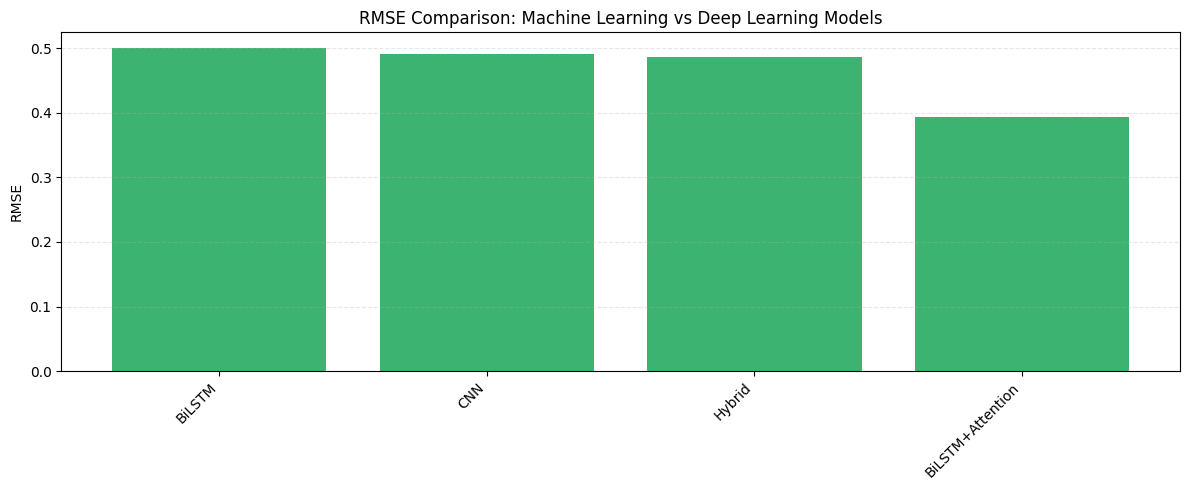

In [94]:
plt.figure(figsize=(12, 5))
plt.bar(combined_rmse["Model"], combined_rmse["RMSE"], color="mediumseagreen")
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")
plt.title("RMSE Comparison: Machine Learning vs Deep Learning Models")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ---------------------------
# Load Dataset
# ---------------------------
df = pd.read_csv("auto_labeled_dataset.csv", encoding="utf-8-sig")
X = df["content"].astype(str).values
y = df["label"].astype(int).values

# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---------------------------
# Tokenization + Padding
# ---------------------------
MAX_WORDS = 15000
MAX_LEN = 200
EMBED_DIM = 128   # If FastText available → replace with 300

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_LEN)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_LEN)

vocab_size = min(MAX_WORDS, len(tokenizer.word_index) + 1)

# ---------------------------
# Embedding Layer
# ---------------------------
embedding_layer = tf.keras.layers.Embedding(
    input_dim=vocab_size,
    output_dim=EMBED_DIM,
    input_length=MAX_LEN
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

model_bilstm = Sequential([
    embedding_layer,
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])


In [72]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential([
    embedding_layer,
    Conv1D(filters=128, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])


In [73]:
model_hybrid = Sequential([
    embedding_layer,
    Conv1D(128, 5, activation="relu"),
    GlobalMaxPooling1D(),
    tf.keras.layers.Reshape((1, 128)),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])


In [74]:
from tensorflow.keras.layers import Attention, Flatten, RepeatVector

input_layer = tf.keras.Input(shape=(MAX_LEN,))
x = embedding_layer(input_layer)

bilstm = Bidirectional(LSTM(64, return_sequences=True))(x)

# Attention
att = Attention()([bilstm, bilstm])
att = Flatten()(att)

out = Dense(64, activation="relu")(att)
out = Dense(1, activation="sigmoid")(out)

model_attention = tf.keras.Model(inputs=input_layer, outputs=out)


In [75]:
models = {
    "BiLSTM": model_bilstm,
    "CNN": model_cnn,
    "Hybrid": model_hybrid,
    "BiLSTM+Attention": model_attention
}

for name, m in models.items():
    m.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [76]:
histories = {}

for name, m in models.items():
    print(f"\n📌 Training: {name}")
    histories[name] = m.fit(
        X_train_pad, y_train,
        validation_split=0.2,
        epochs=8,
        batch_size=32,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)],
        verbose=1
    )



📌 Training: BiLSTM
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 546ms/step - accuracy: 0.6202 - loss: 0.6880 - val_accuracy: 0.3077 - val_loss: 0.7034
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.5757 - loss: 0.6714 - val_accuracy: 0.3077 - val_loss: 0.7226
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.5757 - loss: 0.6444 - val_accuracy: 0.3077 - val_loss: 0.7656

📌 Training: CNN
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.4983 - loss: 0.6858 - val_accuracy: 0.3077 - val_loss: 0.7387
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7070 - loss: 0.6237 - val_accuracy: 0.3077 - val_loss: 0.7987
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6796 - loss: 0.5845 - val_accuracy: 0.3077 - val_loss: 0.8273

📌 Training: Hybrid
Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.4832 - loss: 0.6928 - val_accuracy: 0.3077 - val_loss: 0.7078
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.5911 - 

In [77]:
def evaluate(model, name):
    preds = (model.predict(X_test_pad) > 0.5).astype("int32")

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print(f"\n===== {name} =====")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    return [name, acc, prec, rec, f1]


In [78]:
results = []

for name, m in models.items():
    results.append(evaluate(m, name))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\n📌 FINAL RESULTS")
print(results_df)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step

===== BiLSTM =====
Accuracy : 0.5455
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

===== CNN =====
Accuracy : 0.5455
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step

===== Hybrid =====
Accuracy : 0.5455
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step

===== BiLSTM+Attention =====
Accuracy : 0.8182
Precision: 0.7368
Recall   : 0.9333
F1 Score : 0.8235

📌 FINAL RESULTS
              Model  Accuracy  Precision    Recall        F1
0            BiLSTM  0.545455   0.000000  0.000000  0.000000
1               CNN  0.545455   0.000000  0.000000  0.000000
2            Hybrid  0.545455   0.000000  0.000000  0.000000
3  BiLSTM+Attention  0.818182   0.736842  0.933333  0.823529


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# -------------------------------
# 1. Compute RMSE for each model
# -------------------------------

def compute_rmse(model, X_test, y_test):
    preds = model.predict(X_test)

    # Fix for SVM (predicts -1 sometimes)
    preds = np.where(preds < 0, 0, preds)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

models = {
    "Logistic Regression": best_lr,
    "SVM": best_svm,
    "Naive Bayes": best_nb,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Stacking Classifier": stacking_model
}

rmse_values = []

for name, model in models.items():
    rmse = compute_rmse(model, X_test_tfidf, y_test)
    rmse_values.append([name, rmse])
    print(f"{name}: RMSE = {rmse:.4f}")

rmse_df = pd.DataFrame(rmse_values, columns=["Model", "RMSE"])
rmse_df = rmse_df.sort_values(by="RMSE")  # Best first

print("\n📊 RMSE SUMMARY TABLE")
print(rmse_df)

# -------------------------------
# 2. Plot RMSE Bar Chart
# -------------------------------
plt.figure(figsize=(12,6))
sns.barplot(data=rmse_df, x="Model", y="RMSE", palette="viridis")

plt.title("RMSE Comparison of Machine Learning Models", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("RMSE (Lower is Better)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the graph
plt.savefig("rmse_comparison.png", dpi=300)
plt.show()

print("\nSaved: rmse_comparison.png")



In [ ]:
# ===============================================================
# RMSE Comparison for ML + DL Models (One Graph + Summary Table)
# ===============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# --------------------------------------
# Helper function to compute RMSE
# --------------------------------------
def compute_rmse_binary(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# --------------------------------------
# 1) RMSE for Machine Learning Models
# --------------------------------------

def ml_rmse(model, X_test, y_test):
    preds = model.predict(X_test)

    # SVM sometimes predicts -1 → convert
    preds = np.where(preds < 0, 0, preds)

    return compute_rmse_binary(y_test, preds)

ml_models = {
    "Logistic Regression": best_lr,
    "SVM": best_svm,
    "Naive Bayes": best_nb,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Stacking Classifier": stacking_model
}

ml_rmse_results = []
for name, model in ml_models.items():
    rmse = ml_rmse(model, X_test_tfidf, y_test)
    ml_rmse_results.append([name, rmse])
    print(f"{name} RMSE: {rmse:.4f}")

# --------------------------------------
# 2) RMSE for Deep Learning Models
# --------------------------------------

def dl_rmse(model, X_test, y_test):
    preds = (model.predict(X_test) > 0.5).astype("int32")
    return compute_rmse_binary(y_test, preds)

dl_models = {
    "BiLSTM": model_bilstm,
    "CNN": model_cnn,
    "Hybrid CNN+LSTM": model_hybrid
}

dl_rmse_results = []
for name, model in dl_models.items():
    rmse = dl_rmse(model, X_test_pad, y_test)
    dl_rmse_results.append([name, rmse])
    print(f"{name} RMSE: {rmse:.4f}")

# --------------------------------------
# 3) Combine ML + DL results
# --------------------------------------
all_results = ml_rmse_results + dl_rmse_results
rmse_df = pd.DataFrame(all_results, columns=["Model", "RMSE"])
rmse_df = rmse_df.sort_values(by="RMSE").reset_index(drop=True)

print("\n📊 FINAL RMSE SUMMARY TABLE")
print(rmse_df)

# Save summary
rmse_df.to_csv("all_models_rmse_summary.csv", index=False, encoding="utf-8-sig")

# --------------------------------------
# 4) RMSE Graph (ML + DL)
# --------------------------------------
plt.figure(figsize=(14,6))
sns.barplot(data=rmse_df, x="Model", y="RMSE", palette="coolwarm")

plt.title("RMSE Comparison: ML vs DL Models", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("RMSE (Lower is Better)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("rmse_ml_dl_comparison.png", dpi=300)
plt.show()

print("\nSaved graph as: rmse_ml_dl_comparison.png")
print("Saved table as: all_models_rmse_summary.csv")
